In [1]:
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data Company

In [3]:
df=pd.read_csv('dataset.csv')

Menampilkan data

In [5]:
df

business_code cust_number       name_customer           clear_date  \
0              U001  0200769623        WAL-MAR corp  2020-02-11 00:00:00   
1              U001  0200980828              BEN E   2019-08-08 00:00:00   
2              U001  0200792734          MDV/ trust  2019-12-30 00:00:00   
3              CA02  0140105686            SYSC llc                  NaN   
4              U001  0200769623  WAL-MAR foundation  2019-11-25 00:00:00   
...             ...         ...                 ...                  ...   
49995          U001  0200561861      CO corporation                  NaN   
49996          U001  0200769623          WAL-MAR co  2019-09-03 00:00:00   
49997          U001  0200772595    SAFEW associates  2020-03-05 00:00:00   
49998          U001  0200726979           BJ'S  llc  2019-12-12 00:00:00   
49999          U001  0200020431            DEC corp  2019-01-15 00:00:00   

       buisness_year        doc_id posting_date  document_create_date  \
0             2020.0  1.930438e+09   2020-01-26              20200125   
1             2019.0  1.929646e+09   2019-07-22              20190722   
2             2019.0  1.929874e+09   2019-09-14              20190914   
3             2020.0  2.960623e+09   2020-03-30              20200330   
4             2019.0  1.930148e+09   2019-11-13              20191113   
...              ...           ...          ...                   ...   
49995         2020.0  1.930797e+09   2020-04-21              20200417   
49996         2019.0  1.929744e+09   2019-08-15              20190814   
49997         2020.0  1.930537e+09   2020-02-19              20200218   
49998         2019.0  1.930199e+09   2019-11-27              20191126   
49999         2019.0  1.928576e+09   2019-01-05              20190105   

       document_create_date.1  due_in_date invoice_currency document type  \
0                    20200126   20200210.0              USD            RV   
1                    20190722   20190811.0              USD            RV   
2                    20190914   20190929.0              USD            RV   
3                    20200330   20200410.0              CAD            RV   
4                    20191113   20191128.0              USD            RV   
...                       ...          ...              ...           ...   
49995                20200421   20200506.0              USD            RV   
49996                20190815   20190830.0              USD            RV   
49997                20200219   20200305.0              USD            RV   
49998                20191127   20191212.0              USD            RV   
49999                20190105   20190124.0              USD            RV   

       posting_id  area_business  total_open_amount  baseline_create_date  \
0             1.0            NaN           54273.28            20200126.0   
1             1.0            NaN           79656.60            20190722.0   
2             1.0            NaN            2253.86            20190914.0   
3             1.0            NaN            3299.70            20200331.0   
4             1.0            NaN           33133.29            20191113.0   
...           ...            ...                ...                   ...   
49995         1.0            NaN            3187.86            20200421.0   
49996         1.0            NaN            6766.54            20190815.0   
49997         1.0            NaN            6120.86            20200219.0   
49998         1.0            NaN              63.48            20191127.0   
49999         1.0            NaN            1790.30            20190101.0   

      cust_payment_terms    invoice_id  isOpen  
0                   NAH4  1.930438e+09       0  
1                   NAD1  1.929646e+09       0  
2                   NAA8  1.929874e+09       0  
3                   CA10  2.960623e+09       1  
4                   NAH4  1.930148e+09       0  
...                  ...           ...     ...  
49995               NAA

## Data Understanding

Analisis data untuk memahami struktur, tipe data, dan kualitas data yang akan digunakan

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

Membuat list keterangan dari kolom-kolom yang tersedia

`business_code`= Kode perusahaan tempat transaksi dilakukan.

`cust_number` = Unique ID atau nomor identifikasi pelanggan.

`name_customer` = Nama pelanggan atau perusahaan.

`clear_date` = Tanggal pembayaran invoice diselesaikan.

`buisness_year` = Tahun di mana invoice dibuat.

`doc_id` = Unique ID untuk setiap invoice.

`posting_date` = Tanggal saat invoice dimasukkan ke dalam sistem ERP.

`document_create_date` = Tanggal awal dokumen invoice dibuat. (Mencerminkan kapan invoice mulai di-generate dalam sistem).

`document_create_date.1` = Tanggal dokumen invoice dibuat jika terdapat revisi 

`due_in_date` = Tanggal jatuh tempo pembayaran.

`invoice_currency` = Mata uang yang digunakan dalam invoice.

`document_type` = Jenis dokumen yang digunakan.

`posting_id` = ID atau kode yang digunakan untuk mencatat transaksi ke dalam sistem.

`area_business` = Area bisnis atau sektor industri tempat transaksi terjadi.

`total_open_amount` = Jumlah total yang masih belum dibayarkan oleh pelanggan.

`baseline_create_date` = Tanggal awal invoice dibuat sebagai dasar perhitungan jatuh tempo.

`cust_payment_terms` = Ketentuan pembayaran pelanggan.

`invoice_id` = Unique ID untuk setiap invoice.

`isOpen` Status pembayaran invoice ( 0 = Invoice belum dibayar, 1 = Invoice sudah lunas.)

**Proporsi Customer bedasarkan Mata Uang**

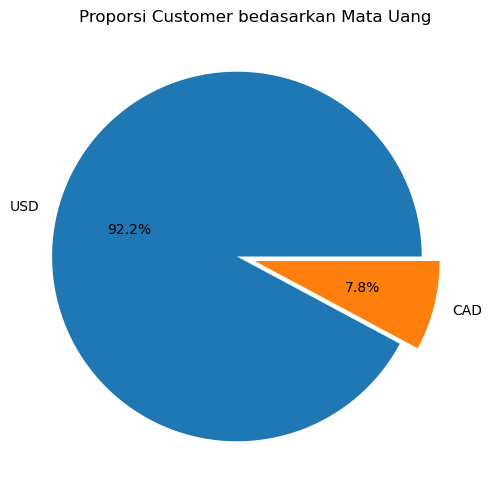

In [89]:
# Get the counts and labels
counts = df['invoice_currency'].value_counts()
labels = counts.index

# Dynamically set the explode parameter
explode = [0.1] + [0] * (len(counts) - 1)  # Explode the first slice

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    explode=explode,
    textprops=dict(color="black")
)
plt.title("Proporsi Customer bedasarkan Mata Uang")
plt.show()

*Insight:*

Customer yang menggunakan mata uang USD lebih banyak dibandingkan customer yang menggunakan mata uang CAD

**Proporsi Customer bedasarkan Business Code**

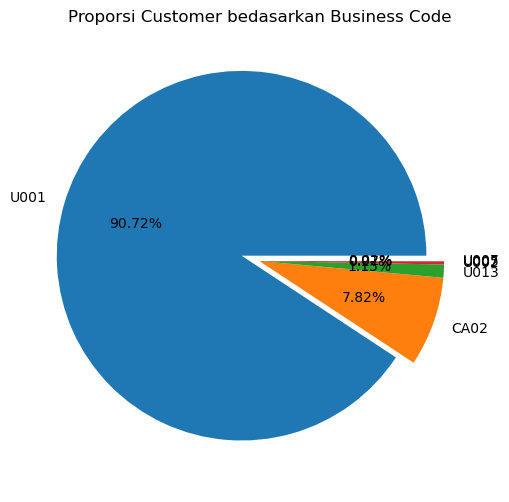

In [106]:
# Get the counts and labels
counts = df['business_code'].value_counts()
labels = counts.index

# Dynamically set the explode parameter
explode = [0.1] + [0] * (len(counts) - 1)  # Explode the first slice

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.2f%%',
    explode=explode,
    textprops=dict(color="black")
)
plt.title("Proporsi Customer bedasarkan Business Code")
plt.show()

*Insight:*

Customer paling banyak terdapat pada business code "U001"

**Jumlah Customer bedasarkan Payment Terms**

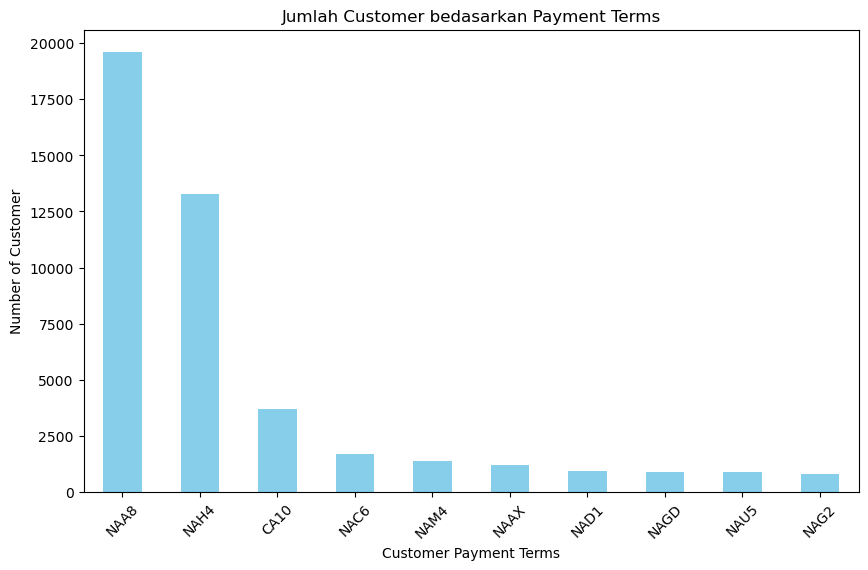

In [117]:
# Plot a bar chart for the top 10 customer payment terms
counts = df['cust_payment_terms'].value_counts().head(10)

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Customer bedasarkan Payment Terms')
plt.xlabel('Customer Payment Terms')
plt.ylabel('Number of Customer')
plt.xticks(rotation=45)
plt.show()

*Insight:*

Customer paling banyak terdapat pada Payment Terms "NAA8" & "NAH4"

## Data Cleaning and Pre-Processing

Melihat data missing value

In [13]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

Kolom `clear_date` memiliki 10.000 missing values, namun missing value tersebut tidak dihapus karena menunjukkan bahwa pelanggan belum menyelesaikan pembayaran.

Kolom `area_business` dihapus karena seluruh datanya kosong (missing values)

In [16]:
df = df.drop(columns=['area_business'])
df

business_code cust_number       name_customer           clear_date  \
0              U001  0200769623        WAL-MAR corp  2020-02-11 00:00:00   
1              U001  0200980828              BEN E   2019-08-08 00:00:00   
2              U001  0200792734          MDV/ trust  2019-12-30 00:00:00   
3              CA02  0140105686            SYSC llc                  NaN   
4              U001  0200769623  WAL-MAR foundation  2019-11-25 00:00:00   
...             ...         ...                 ...                  ...   
49995          U001  0200561861      CO corporation                  NaN   
49996          U001  0200769623          WAL-MAR co  2019-09-03 00:00:00   
49997          U001  0200772595    SAFEW associates  2020-03-05 00:00:00   
49998          U001  0200726979           BJ'S  llc  2019-12-12 00:00:00   
49999          U001  0200020431            DEC corp  2019-01-15 00:00:00   

       buisness_year        doc_id posting_date  document_create_date  \
0             2020.0  1.930438e+09   2020-01-26              20200125   
1             2019.0  1.929646e+09   2019-07-22              20190722   
2             2019.0  1.929874e+09   2019-09-14              20190914   
3             2020.0  2.960623e+09   2020-03-30              20200330   
4             2019.0  1.930148e+09   2019-11-13              20191113   
...              ...           ...          ...                   ...   
49995         2020.0  1.930797e+09   2020-04-21              20200417   
49996         2019.0  1.929744e+09   2019-08-15              20190814   
49997         2020.0  1.930537e+09   2020-02-19              20200218   
49998         2019.0  1.930199e+09   2019-11-27              20191126   
49999         2019.0  1.928576e+09   2019-01-05              20190105   

       document_create_date.1  due_in_date invoice_currency document type  \
0                    20200126   20200210.0              USD            RV   
1                    20190722   20190811.0              USD            RV   
2                    20190914   20190929.0              USD            RV   
3                    20200330   20200410.0              CAD            RV   
4                    20191113   20191128.0              USD            RV   
...                       ...          ...              ...           ...   
49995                20200421   20200506.0              USD            RV   
49996                20190815   20190830.0              USD            RV   
49997                20200219   20200305.0              USD            RV   
49998                20191127   20191212.0              USD            RV   
49999                20190105   20190124.0              USD            RV   

       posting_id  total_open_amount  baseline_create_date cust_payment_terms  \
0             1.0           54273.28            20200126.0               NAH4   
1             1.0           79656.60            20190722.0               NAD1   
2             1.0            2253.86            20190914.0               NAA8   
3             1.0            3299.70            20200331.0               CA10   
4             1.0           33133.29            20191113.0               NAH4   
...           ...                ...                   ...                ...   
49995         1.0            3187.86            20200421.0               NAA8   
49996         1.0            6766.54            20190815.0               NAH4   
49997         1.0            6120.86            20200219.0               NAA8   
49998         1.0              63.48            20191127.0               NAA8   
49999         1.0            1790.30            20190101.0               NAM4   

         invoice_id  isOpen  
0      1.930438e+09       0  
1      1.929646e+09       0  
2      1.929874e+09       0  
3      2.960623e+09       1  
4      1.930148e+09       0  
...             ...     ...  
49995  1.930797e+09       1  
49996  1.929744e+09       0  
49997  1.930537e+09       0  
49998  1.930199e+0

Menghapus duplikasi pada pada kolom `invoice_id`

In [18]:
df['invoice_id'].nunique()
df = df.drop_duplicates(subset=['invoice_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48834 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           48834 non-null  object 
 1   cust_number             48834 non-null  object 
 2   name_customer           48834 non-null  object 
 3   clear_date              39153 non-null  object 
 4   buisness_year           48834 non-null  float64
 5   doc_id                  48834 non-null  float64
 6   posting_date            48834 non-null  object 
 7   document_create_date    48834 non-null  int64  
 8   document_create_date.1  48834 non-null  int64  
 9   due_in_date             48834 non-null  float64
 10  invoice_currency        48834 non-null  object 
 11  document type           48834 non-null  object 
 12  posting_id              48834 non-null  float64
 13  total_open_amount       48834 non-null  float64
 14  baseline_create_date    48834 non-null  flo

Mengubah data waktu menjadi format datetime

`due_in_date`, `clear_date`, `posting_date`, `document_create_date`, `document_create_date`, dan `baseline_create_date`

In [20]:
# ubah due_in_date ke datetime
df['due_in_date'] = df['due_in_date'].astype(str)
df['due_in_date'] = df['due_in_date'].str.replace('.0', '')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')

# ubah clear_date ke datetime
df['clear_date'] = df['clear_date'].str.replace(' 00:00:00', '')
df['clear_date'] = pd.to_datetime(df['clear_date'], format='%Y-%m-%d')

# ubah posting_date ke datetime
df['posting_date'] = df['posting_date'].astype(str)
df['posting_date'] = df['posting_date'].str.replace('-', '')
df['posting_date'] = pd.to_datetime(df['posting_date'], format='%Y%m%d')

# ubah document_create_date ke datetime
df['document_create_date'] = df['document_create_date'].astype(str)
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')

# ubah document_create_date.1 ke datetime
df['document_create_date.1'] = df['document_create_date.1'].astype(str)
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')

# ubah baseline_create_date ke datetime
df['baseline_create_date'] = df['baseline_create_date'].astype(str)
df['baseline_create_date'] = df['baseline_create_date'].str.replace('.0', '')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48834 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           48834 non-null  object        
 1   cust_number             48834 non-null  object        
 2   name_customer           48834 non-null  object        
 3   clear_date              39153 non-null  datetime64[ns]
 4   buisness_year           48834 non-null  float64       
 5   doc_id                  48834 non-null  float64       
 6   posting_date            48834 non-null  datetime64[ns]
 7   document_create_date    48834 non-null  datetime64[ns]
 8   document_create_date.1  48834 non-null  datetime64[ns]
 9   due_in_date             48834 non-null  datetime64[ns]
 10  invoice_currency        48834 non-null  object        
 11  document type           48834 non-null  object        
 12  posting_id              48834 non-null  float64    

In [21]:
display(df['posting_date'].min())
display(df['posting_date'].max())

Timestamp('2018-12-30 00:00:00')

Timestamp('2020-05-22 00:00:00')

In [22]:
df["cohort_month"] = df.groupby("cust_number")["posting_date"].transform("min").dt.to_period('M')
df

business_code cust_number       name_customer clear_date  buisness_year  \
0              U001  0200769623        WAL-MAR corp 2020-02-11         2020.0   
1              U001  0200980828              BEN E  2019-08-08         2019.0   
2              U001  0200792734          MDV/ trust 2019-12-30         2019.0   
3              CA02  0140105686            SYSC llc        NaT         2020.0   
4              U001  0200769623  WAL-MAR foundation 2019-11-25         2019.0   
...             ...         ...                 ...        ...            ...   
49995          U001  0200561861      CO corporation        NaT         2020.0   
49996          U001  0200769623          WAL-MAR co 2019-09-03         2019.0   
49997          U001  0200772595    SAFEW associates 2020-03-05         2020.0   
49998          U001  0200726979           BJ'S  llc 2019-12-12         2019.0   
49999          U001  0200020431            DEC corp 2019-01-15         2019.0   

             doc_id posting_date document_create_date document_create_date.1  \
0      1.930438e+09   2020-01-26           2020-01-25             2020-01-26   
1      1.929646e+09   2019-07-22           2019-07-22             2019-07-22   
2      1.929874e+09   2019-09-14           2019-09-14             2019-09-14   
3      2.960623e+09   2020-03-30           2020-03-30             2020-03-30   
4      1.930148e+09   2019-11-13           2019-11-13             2019-11-13   
...             ...          ...                  ...                    ...   
49995  1.930797e+09   2020-04-21           2020-04-17             2020-04-21   
49996  1.929744e+09   2019-08-15           2019-08-14             2019-08-15   
49997  1.930537e+09   2020-02-19           2020-02-18             2020-02-19   
49998  1.930199e+09   2019-11-27           2019-11-26             2019-11-27   
49999  1.928576e+09   2019-01-05           2019-01-05             2019-01-05   

      due_in_date invoice_currency document type  posting_id  \
0      2020-02-10              USD            RV         1.0   
1      2019-08-11              USD            RV         1.0   
2      2019-09-29              USD            RV         1.0   
3      2020-04-10              CAD            RV         1.0   
4      2019-11-28              USD            RV         1.0   
...           ...              ...           ...         ...   
49995  2020-05-06              USD            RV         1.0   
49996  2019-08-30              USD            RV         1.0   
49997  2020-03-05              USD            RV         1.0   
49998  2019-12-12              USD            RV         1.0   
49999  2019-01-24              USD            RV         1.0   

       total_open_amount baseline_create_date cust_payment_terms  \
0               54273.28           2020-01-26               NAH4   
1               79656.60           2019-07-22               NAD1   
2                2253.86           2019-09-14               NAA8   
3                3299.70           2020-03-31               CA10   
4               33133.29           2019-11-13               NAH4   
...                  ...                  ...                ...   
49995            3187.86           2020-04-21               NAA8   
49996            6766.54           2019-08-15               NAH4   
49997            6120.86           2020-02-19               NAA8   
49998              63.48           2019-11-27               NAA8   
49999            1790.30           2019-01-01               NAM4   

         invoice_id  isOpen cohort_month  
0      1.930438e+09       0      2018-12  
1      1.929646e+09       0      2019-01  
2      1.929874e+09       0      2018-12  
3      2.960623e+09       1      2019-01  
4      1.930148e+09       0      2018-12  
...             ...     ...          ...  
49995  1.930797e+09       1      2019-01  
49996  1.929744e+09       0      2018-12  
49997  1.930537e+09       0      2019-01  
49998  1.930199e+09       0      2018-12  
49999  1.9285

## Cohort Retention Analysis

In [24]:
df_cohort=df.copy()

Mendefinisikan `cohort_month`

Bulan aktivitas pertama customer melakukan pembuatan invoice (`posting_date`)

Melihat tanggal awal dan tanggal akhir data

In [27]:
display(df['posting_date'].min())
display(df['posting_date'].max())

Timestamp('2018-12-30 00:00:00')

Timestamp('2020-05-22 00:00:00')

Karena pada bulan Desember 2018 hanya mengambil data dimulai pada tanggal 30, yang mana tidak merepresentasikan seluruh transaksi pada bulan tersebut,
maka diputuskan untuk tidak mengambil data pada pada Desember 2018

Dan karena pada bulan Mei 2020 hanya mengambil data sampai pada tanggal 22, yang mana tidak merepresentasikan seluruh transaksi pada bulan tersebut,
maka diputuskan untuk tidak mengambil data pada pada Mei 2020

In [29]:
df_cohort = df_cohort[(df_cohort['cohort_month'] != '2018-12')&(df_cohort['cohort_month'] != '2020-05')]
df_cohort

business_code cust_number       name_customer clear_date  buisness_year  \
1              U001  0200980828              BEN E  2019-08-08         2019.0   
3              CA02  0140105686            SYSC llc        NaT         2020.0   
10             U001  0200418007                 AM         NaT         2020.0   
11             U001  0200743129           BROOKS co 2019-01-22         2019.0   
12             U001  0200186937    SYSC corporation 2019-05-06         2019.0   
...             ...         ...                 ...        ...            ...   
49983          U001  0200793513   KROGER associates 2019-07-17         2019.0   
49987          U001  0200732755  KROGER corporation 2019-08-19         2019.0   
49995          U001  0200561861      CO corporation        NaT         2020.0   
49997          U001  0200772595    SAFEW associates 2020-03-05         2020.0   
49999          U001  0200020431            DEC corp 2019-01-15         2019.0   

             doc_id posting_date document_create_date document_create_date.1  \
1      1.929646e+09   2019-07-22           2019-07-22             2019-07-22   
3      2.960623e+09   2020-03-30           2020-03-30             2020-03-30   
10     1.930611e+09   2020-03-11           2020-03-06             2020-03-11   
11     1.928551e+09   2019-01-02           2019-01-02             2019-01-02   
12     1.929152e+09   2019-04-15           2019-04-15             2019-04-15   
...             ...          ...                  ...                    ...   
49983  1.929565e+09   2019-07-02           2019-07-02             2019-07-02   
49987  1.929687e+09   2019-08-02           2019-08-01             2019-08-02   
49995  1.930797e+09   2020-04-21           2020-04-17             2020-04-21   
49997  1.930537e+09   2020-02-19           2020-02-18             2020-02-19   
49999  1.928576e+09   2019-01-05           2019-01-05             2019-01-05   

      due_in_date invoice_currency document type  posting_id  \
1      2019-08-11              USD            RV         1.0   
3      2020-04-10              CAD            RV         1.0   
10     2020-03-26              USD            RV         1.0   
11     2019-01-17              USD            RV         1.0   
12     2019-04-30              USD            RV         1.0   
...           ...              ...           ...         ...   
49983  2019-07-17              USD            RV         1.0   
49987  2019-08-17              USD            RV         1.0   
49995  2020-05-06              USD            RV         1.0   
49997  2020-03-05              USD            RV         1.0   
49999  2019-01-24              USD            RV         1.0   

       total_open_amount baseline_create_date cust_payment_terms  \
1               79656.60           2019-07-22               NAD1   
3                3299.70           2020-03-31               CA10   
10               3525.59           2020-03-11               NAA8   
11             103147.37           2019-01-02               NAA8   
12              16381.45           2019-04-15               NAA8   
...                  ...                  ...                ...   
49983           66128.25           2019-07-02               NAA8   
49987          132041.22           2019-08-02               NAA8   
49995            3187.86           2020-04-21               NAA8   
49997            6120.86           2020-02-19               NAA8   
49999            1790.30           2019-01-01               NAM4   

         invoice_id  isOpen cohort_month  
1      1.929646e+09       0      2019-01  
3      2.960623e+09       1      2019-01  
10     1.930611e+09       1      2019-01  
11     1.928551e+09       0      2019-01  
12     1.929152e+09       0      2019-01  
...             ...     ...          ...  
49983  1.929565e+09       0      2019-01  
49987  1.929687e+09       0      2019-01  
49995  1.930797e+09       1      2019-01  
49997  1.930537e+09       0      2019-01  
49999  1.9285

Mendefinisikan `current_transaction_month`

Bulan observasi / Bulan terakhir data diambil

In [31]:
df_cohort['current_transaction_month']=df_cohort['posting_date'].dt.to_period('M')

Menghapus cohort 2018-12 dan drop 2020-05

In [33]:
df_cohort=df_cohort[df_cohort['current_transaction_month']!='2020-05']


Membuat Data Cohort Baru

In [35]:
df_cohort=df_cohort[['cust_number', 'cohort_month', 'current_transaction_month']]

df_cohort.drop_duplicates(inplace=True)
df_cohort.sample(5)

cust_number cohort_month current_transaction_month
29624  0140103480      2019-01                   2019-05
26649   200778998      2019-03                   2020-03
28888  0200501669      2019-01                   2019-03
19325  0200799538      2019-01                   2019-08
33033  0200382900      2019-01                   2019-11

Mendefinisikan `count_user`

Banyak pelanggan berdasarkan kelompok cohort_month dan current_transaction_month

In [37]:
cohort_retention=df_cohort.groupby(['cohort_month','current_transaction_month'])['cust_number'].count().reset_index().rename(columns={'cust_number':'count_user'})
cohort_retention

cohort_month current_transaction_month  count_user
0        2019-01                   2019-01         407
1        2019-01                   2019-02         237
2        2019-01                   2019-03         240
3        2019-01                   2019-04         251
4        2019-01                   2019-05         243
..           ...                       ...         ...
131      2020-02                   2020-03           3
132      2020-02                   2020-04           2
133      2020-03                   2020-03          44
134      2020-03                   2020-04           6
135      2020-04                   2020-04          23

[136 rows x 3 columns]

Mendefinisikan `period_distance`

Jarak antara cohort_month dengan current_month

In [39]:
cohort_retention['period_distance'] = (
    (cohort_retention['current_transaction_month'].dt.year - cohort_retention['cohort_month'].dt.year) * 12 +
    (cohort_retention['current_transaction_month'].dt.month - cohort_retention['cohort_month'].dt.month)
)

cohort_retention.head(20)

cohort_month current_transaction_month  count_user  period_distance
0       2019-01                   2019-01         407                0
1       2019-01                   2019-02         237                1
2       2019-01                   2019-03         240                2
3       2019-01                   2019-04         251                3
4       2019-01                   2019-05         243                4
5       2019-01                   2019-06         230                5
6       2019-01                   2019-07         229                6
7       2019-01                   2019-08         238                7
8       2019-01                   2019-09         230                8
9       2019-01                   2019-10         225                9
10      2019-01                   2019-11         211               10
11      2019-01                   2019-12         162               11
12      2019-01                   2020-01         217               12
13      2019-01                   2020-02         212               13
14      2019-01                   2020-03         239               14
15      2019-01                   2020-04         205               15
16      2019-02                   2019-02         181                0
17      2019-02                   2019-03          78                1
18      2019-02                   2019-04          73                2
19      2019-02                   2019-05          58                3

Mengecek apakah Bulan Desember 2018 menampilkan seluruh data pada bulan Desember

Membuat tabel pivot dengan `cohort_retention_pivot`

In [42]:
cohort_retention_pivot=cohort_retention.pivot_table(index='cohort_month',columns='period_distance',values='count_user')
cohort_retention_pivot

period_distance     0      1      2      3      4      5      6      7   \
cohort_month                                                              
2019-01          407.0  237.0  240.0  251.0  243.0  230.0  229.0  238.0   
2019-02          181.0   78.0   73.0   58.0   62.0   63.0   60.0   36.0   
2019-03          179.0   52.0   41.0   41.0   49.0   43.0   27.0   20.0   
2019-04          108.0   11.0   15.0   11.0   14.0    5.0   13.0   10.0   
2019-05           80.0   19.0   17.0   15.0    4.0   11.0    6.0    7.0   
2019-06           75.0    9.0    8.0    9.0    6.0    6.0    4.0    6.0   
2019-07           74.0    6.0    6.0    5.0    5.0    3.0    5.0    4.0   
2019-08           43.0    4.0    8.0    3.0    1.0    4.0    2.0   11.0   
2019-09           32.0    3.0    3.0    2.0    4.0    1.0    1.0    1.0   
2019-10           33.0    2.0    1.0    3.0    3.0    2.0    5.0    NaN   
2019-11           32.0    3.0    3.0    2.0    3.0    2.0    NaN    NaN   
2019-12           15.0    2.0    1.0    3.0    2.0    NaN    NaN    NaN   
2020-01           23.0    3.0    2.0    2.0    NaN    NaN    NaN    NaN   
2020-02           31.0    3.0    2.0    NaN    NaN    NaN    NaN    NaN   
2020-03           44.0    6.0    NaN    NaN    NaN    NaN    NaN    NaN   
2020-04           23.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

period_distance     8      9      10     11     12     13     14     15  
cohort_month                                                             
2019-01          230.0  225.0  211.0  162.0  217.0  212.0  239.0  205.0  
2019-02           38.0   30.0   25.0   41.0   37.0   58.0   44.0    NaN  
2019-03           20.0   10.0   27.0   31.0   42.0   28.0    NaN    NaN  
2019-04            4.0   11.0   10.0   25.0   13.0    NaN    NaN    NaN  
2019-05           10.0    5.0   11.0    8.0    NaN    NaN    NaN    NaN  
2019-06           10.0   12.0    8.0    NaN    NaN    NaN    NaN    NaN  
2019-07            9.0   10.0    NaN    NaN    NaN    NaN    NaN    NaN  
2019-08            3.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2019-09            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2019-10            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2019-11            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2019-12            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2020-01            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2020-02            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2020-03            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2020-04            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN

Mengubah ke dalam bentuk persen dengan `cohort_retention_final`

In [44]:
cohort_retention_final = cohort_retention_pivot.div(cohort_retention_pivot.iloc[:, 0], axis=0)
cohort_retention_final

period_distance   0         1         2         3         4         5   \
cohort_month                                                             
2019-01          1.0  0.582310  0.589681  0.616708  0.597052  0.565111   
2019-02          1.0  0.430939  0.403315  0.320442  0.342541  0.348066   
2019-03          1.0  0.290503  0.229050  0.229050  0.273743  0.240223   
2019-04          1.0  0.101852  0.138889  0.101852  0.129630  0.046296   
2019-05          1.0  0.237500  0.212500  0.187500  0.050000  0.137500   
2019-06          1.0  0.120000  0.106667  0.120000  0.080000  0.080000   
2019-07          1.0  0.081081  0.081081  0.067568  0.067568  0.040541   
2019-08          1.0  0.093023  0.186047  0.069767  0.023256  0.093023   
2019-09          1.0  0.093750  0.093750  0.062500  0.125000  0.031250   
2019-10          1.0  0.060606  0.030303  0.090909  0.090909  0.060606   
2019-11          1.0  0.093750  0.093750  0.062500  0.093750  0.062500   
2019-12          1.0  0.133333  0.066667  0.200000  0.133333       NaN   
2020-01          1.0  0.130435  0.086957  0.086957       NaN       NaN   
2020-02          1.0  0.096774  0.064516       NaN       NaN       NaN   
2020-03          1.0  0.136364       NaN       NaN       NaN       NaN   
2020-04          1.0       NaN       NaN       NaN       NaN       NaN   

period_distance        6         7         8         9         10        11  \
cohort_month                                                                  
2019-01          0.562654  0.584767  0.565111  0.552826  0.518428  0.398034   
2019-02          0.331492  0.198895  0.209945  0.165746  0.138122  0.226519   
2019-03          0.150838  0.111732  0.111732  0.055866  0.150838  0.173184   
2019-04          0.120370  0.092593  0.037037  0.101852  0.092593  0.231481   
2019-05          0.075000  0.087500  0.125000  0.062500  0.137500  0.100000   
2019-06          0.053333  0.080000  0.133333  0.160000  0.106667       NaN   
2019-07          0.067568  0.054054  0.121622  0.135135       NaN       NaN   
2019-08          0.046512  0.255814  0.069767       NaN       NaN       NaN   
2019-09          0.031250  0.031250       NaN       NaN       NaN       NaN   
2019-10          0.151515       NaN       NaN       NaN       NaN       NaN   
2019-11               NaN       NaN       NaN       NaN       NaN       NaN   
2019-12               NaN       NaN       NaN       NaN       NaN       NaN   
2020-01               NaN       NaN       NaN       NaN       NaN       NaN   
2020-02               NaN       NaN       NaN       NaN       NaN       NaN   
2020-03               NaN       NaN       NaN       NaN       NaN       NaN   
2020-04               NaN       NaN       NaN       NaN       NaN       NaN   

period_distance        12        13        14        15  
cohort_month                                             
2019-01          0.533170  0.520885  0.587224  0.503686  
2019-02          0.204420  0.320442  0.243094       NaN  
2019-03          0.234637  0.156425       NaN       NaN  
2019-04          0.120370       NaN       NaN       NaN  
2019-05               NaN       NaN       NaN       NaN  
2019-06               NaN       NaN       NaN       NaN  
2019-07               NaN       NaN       NaN       NaN  
2019-08               NaN       NaN       NaN       NaN  
2019-09               NaN       NaN       NaN       NaN  
2019-10               NaN       NaN       NaN       NaN  
2019-11               NaN       NaN       NaN       NaN  
2019-12               NaN       NaN       NaN       NaN  
2020-01               NaN       NaN       NaN       NaN  
2020-02               NaN       NaN       NaN       NaN  
2020-03               NaN       NaN       NaN       NaN  
2020-04               NaN       NaN       NaN       NaN

Membuat Heatmap

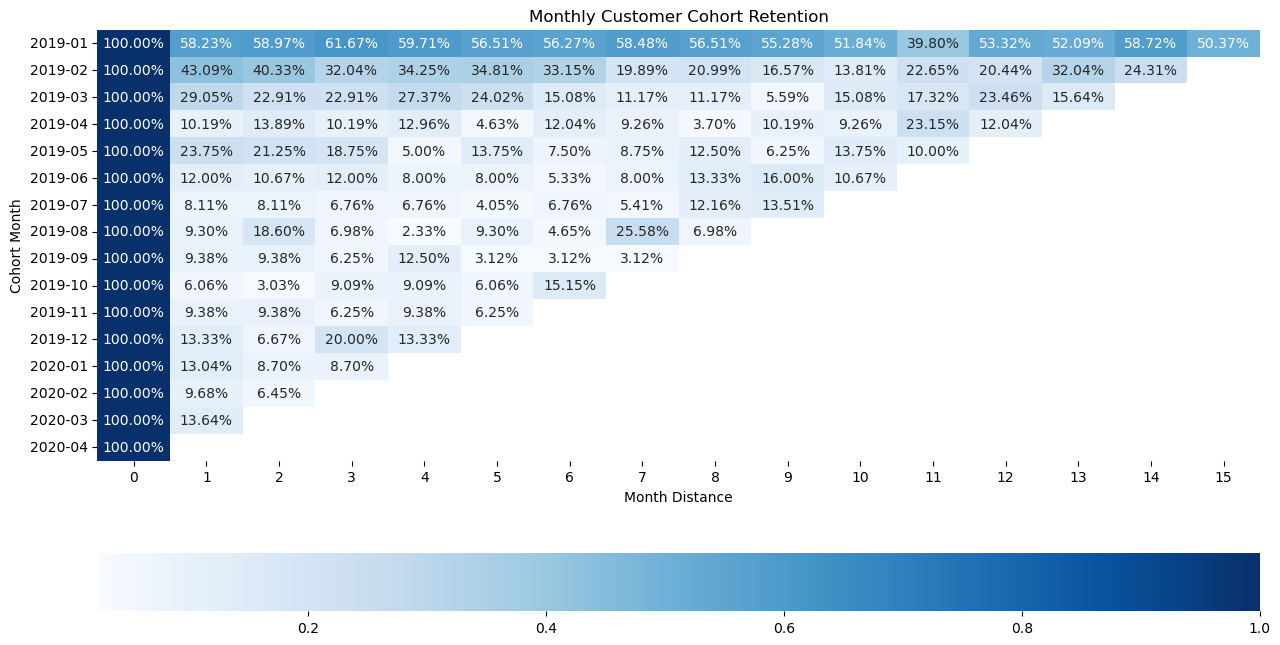

In [46]:
plt.figure(figsize=(15,8))
sns.heatmap(data=cohort_retention_final,annot=True,fmt='.2%',
           cbar_kws={'orientation':'horizontal'},
           cmap='Blues')
plt.title('Monthly Customer Cohort Retention')
plt.xlabel('Month Distance')
plt.ylabel('Cohort Month')
plt.show()

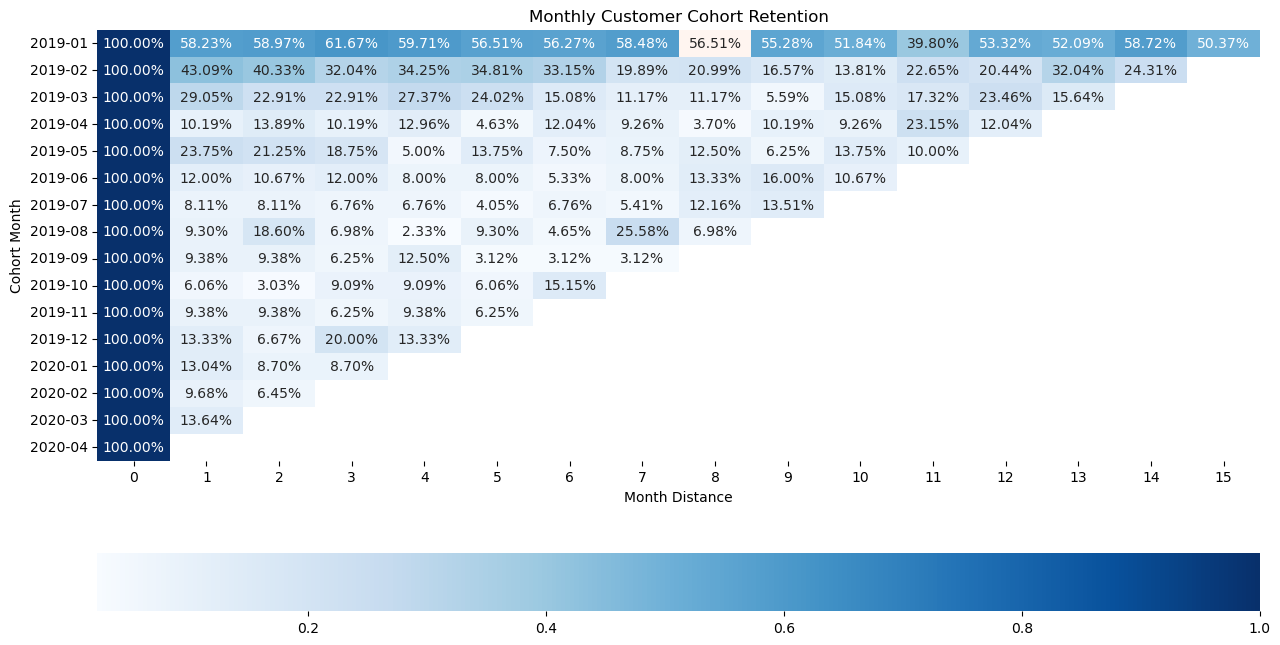

In [47]:
import numpy as np
plt.figure(figsize=(15, 8))

# Membuat mask untuk mengatur warna sel
mask = np.zeros_like(cohort_retention_final, dtype=bool)
# Atur sel khusus (contoh: row=0 (2019-01), col=8 (month distance 8))
mask[0, 8] = True

# Heatmap dengan dua lapisan warna
sns.heatmap(data=cohort_retention_final, 
            annot=True, fmt='.2%', cbar_kws={'orientation': 'horizontal'},
            cmap='Blues', mask=mask, alpha=1)

# Overlay warna spesifik pada sel tertentu
sns.heatmap(data=cohort_retention_final, 
            annot=True, fmt='.2%', cbar=False, 
            cmap='Reds', mask=~mask, alpha=1)

plt.title('Monthly Customer Cohort Retention')
plt.xlabel('Month Distance')
plt.ylabel('Cohort Month')
plt.show()

Berdasarkan analisis terhadap grafik cohort retention,

1. Terjadi penurunan retensi pelanggan yang signifikan seiring bertambahnya jarak waktu sejak awal kohort.
2. Terdapat titik-titik kritis di mana banyak pelanggan berhenti menggunakan layanan, yaitu pada bulan ke-9 dan ke-12 pada 2019.
3. Lalu terjadi sedikit kenaikan pada bulan ke-3 pada 2020

Maka rekomendasi yang dapat disarankan adalah,

1. Identifikasi penyebab penurunan signifikan retensi pada bulan ke-9 dan ke-12, dan lakukan intervensi seperti penawaran khusus atau komunikasi lebih intensif.
2. Perkuat strategi yang berhasil pada bulan ke-3 2020 dengan insentif atau promosi.
4. Lakukan pemantauan dan sesuaikan strategi secara iteratif berdasarkan data terbaru untuk meningkatkan retensi pelanggan.

## Lineplot Retention per Cohort

Membuat variabel lineplot dengan `cohort_retention`

In [51]:
lineplot=cohort_retention.copy()

In [52]:
lineplot['cohort_month'] = lineplot['cohort_month'].astype(str)
lineplot['current_transaction_month'] = lineplot['current_transaction_month'].astype(str)
lineplot

cohort_month current_transaction_month  count_user  period_distance
0        2019-01                   2019-01         407                0
1        2019-01                   2019-02         237                1
2        2019-01                   2019-03         240                2
3        2019-01                   2019-04         251                3
4        2019-01                   2019-05         243                4
..           ...                       ...         ...              ...
131      2020-02                   2020-03           3                1
132      2020-02                   2020-04           2                2
133      2020-03                   2020-03          44                0
134      2020-03                   2020-04           6                1
135      2020-04                   2020-04          23                0

[136 rows x 4 columns]

berfungsi untuk mengelompokkan data berdasarkan kolom `cohort_month` dan kemudian mengambil nilai maksimum untuk setiap kelompok tersebut.

In [54]:
lineplot_0 = lineplot.groupby(['cohort_month']).agg({'count_user': 'max'})
lineplot_0

count_user
cohort_month            
2019-01              407
2019-02              181
2019-03              179
2019-04              108
2019-05               80
2019-06               75
2019-07               74
2019-08               43
2019-09               32
2019-10               33
2019-11               32
2019-12               15
2020-01               23
2020-02               31
2020-03               44
2020-04               23

Melakukan perhitungan `percentage` untuk setiap `cohort_month`, dengan nilai `count_user` yang telah dinormalisasi berdasarkan nilai maksimum per bulan kohort.

In [56]:
lineplot_percent = lineplot.set_index(['cohort_month']).div(lineplot_0, level='cohort_month').rename(columns={'count_user': 'percentage'}).reset_index()
lineplot_percent

cohort_month  percentage current_transaction_month  period_distance
0        2019-01    1.000000                       NaN              NaN
1        2019-01    0.582310                       NaN              NaN
2        2019-01    0.589681                       NaN              NaN
3        2019-01    0.616708                       NaN              NaN
4        2019-01    0.597052                       NaN              NaN
..           ...         ...                       ...              ...
131      2020-02    0.096774                       NaN              NaN
132      2020-02    0.064516                       NaN              NaN
133      2020-03    1.000000                       NaN              NaN
134      2020-03    0.136364                       NaN              NaN
135      2020-04    1.000000                       NaN              NaN

[136 rows x 4 columns]

menambahkan kolom `current_transaction_month` dan `period_distance` ke dalam `lineplot_percent`. 

In [58]:
lineplot_percent['current_transaction_month'] = lineplot['current_transaction_month']
lineplot_percent['period_distance'] = lineplot['period_distance']
display(lineplot_percent)

cohort_month  percentage current_transaction_month  period_distance
0        2019-01    1.000000                   2019-01                0
1        2019-01    0.582310                   2019-02                1
2        2019-01    0.589681                   2019-03                2
3        2019-01    0.616708                   2019-04                3
4        2019-01    0.597052                   2019-05                4
..           ...         ...                       ...              ...
131      2020-02    0.096774                   2020-03                1
132      2020-02    0.064516                   2020-04                2
133      2020-03    1.000000                   2020-03                0
134      2020-03    0.136364                   2020-04                1
135      2020-04    1.000000                   2020-04                0

[136 rows x 4 columns]

Membuat Lineplot

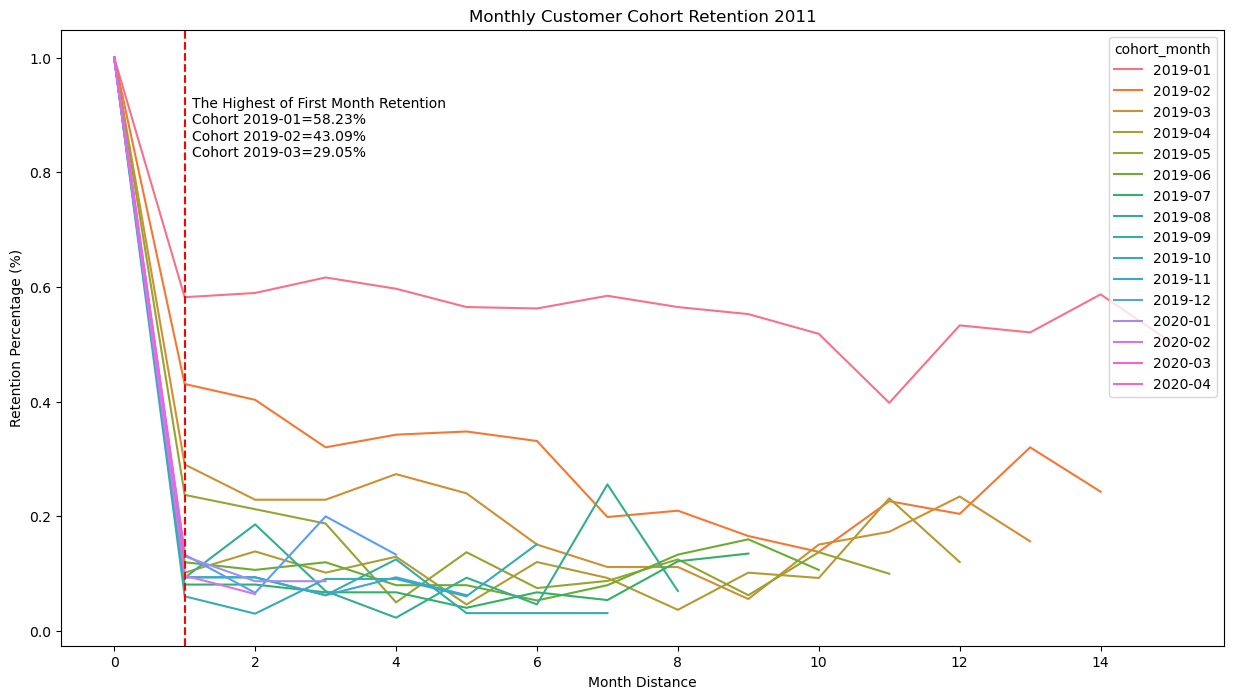

In [60]:
plt.figure(figsize=(15,8))

sns.lineplot(data=lineplot_percent,x='period_distance',y='percentage',hue='cohort_month')

plt.axvline(x=1,linestyle='--',color='red')

top_3=lineplot_percent[lineplot_percent['period_distance']==1].sort_values(by='percentage',ascending=False).head()
top_3_name=top_3['cohort_month'].to_list()
top_3_percentage=top_3['percentage'].to_list()

text=f'''
The Highest of First Month Retention
Cohort {top_3_name[0]}={top_3_percentage[0]:.2%}
Cohort {top_3_name[1]}={top_3_percentage[1]:.2%}
Cohort {top_3_name[2]}={top_3_percentage[2]:.2%}
'''

plt.text(1.1,0.8,text)

plt.xlabel('Month Distance')
plt.ylabel('Retention Percentage (%)')
plt.title('Monthly Customer Cohort Retention 2011')
plt.show()

Berdasarkan analisis terhadap lineplot cohort retention,

1. Beberapa kohort, seperti 2019-01, 2019-02, dan 2019-03 menunjukkan tingkat retensi awal yang lebih tinggi dibandingkan kohort lain.
2. Terjadi penurunan retensi pelanggan yang signifikan seiring bertambahnya jarak waktu sejak awal kohort.
3. Terdapat titik-titik kritis di mana banyak pelanggan berhenti menggunakan layanan, yaitu pada bulan ke-9 dan ke-12 pada 2019.
4. Lalu terjadi sedikit kenaikan pada bulan ke-3 pada 2020

Maka rekomendasi yang dapat disarankan adalah,

1. Lakukan analisis lebih dalam untuk memahami faktor-faktor yang menyebabkan tingkat retensi yang lebih tinggi pada kohort ini. Apakah ada faktor eksternal atau perubahan kebijakan yang memengaruhi tingkat retensi pada bulan selanjutnya yang menurun drastis?
2. Identifikasi penyebab penurunan signifikan retensi pada bulan ke-9 dan ke-12, dan lakukan intervensi seperti penawaran khusus atau komunikasi lebih intensif.
3. Perkuat strategi yang berhasil pada bulan ke-3 2020 dengan insentif atau promosi.
4. Lakukan pemantauan dan sesuaikan strategi secara iteratif berdasarkan data terbaru untuk meningkatkan retensi pelanggan.

In [62]:
cohort_retention_final.to_csv('cohort_retention_final_kelompok3.csv')

In [63]:
# cohort_retention_pivot.to_csv('cohort_retention_pivot.csv')
lineplot_percent.to_csv('lineplot_percent_kelompok3.csv', index=False)

# cohort retention business code

Menganalisis retensi pelanggan berdasarkan `business_code`

In [66]:
x = pd.DataFrame(df['business_code'].value_counts()).reset_index()
y = list(x['business_code'])
y

['U001', 'CA02', 'U013', 'U002', 'U005', 'U007']

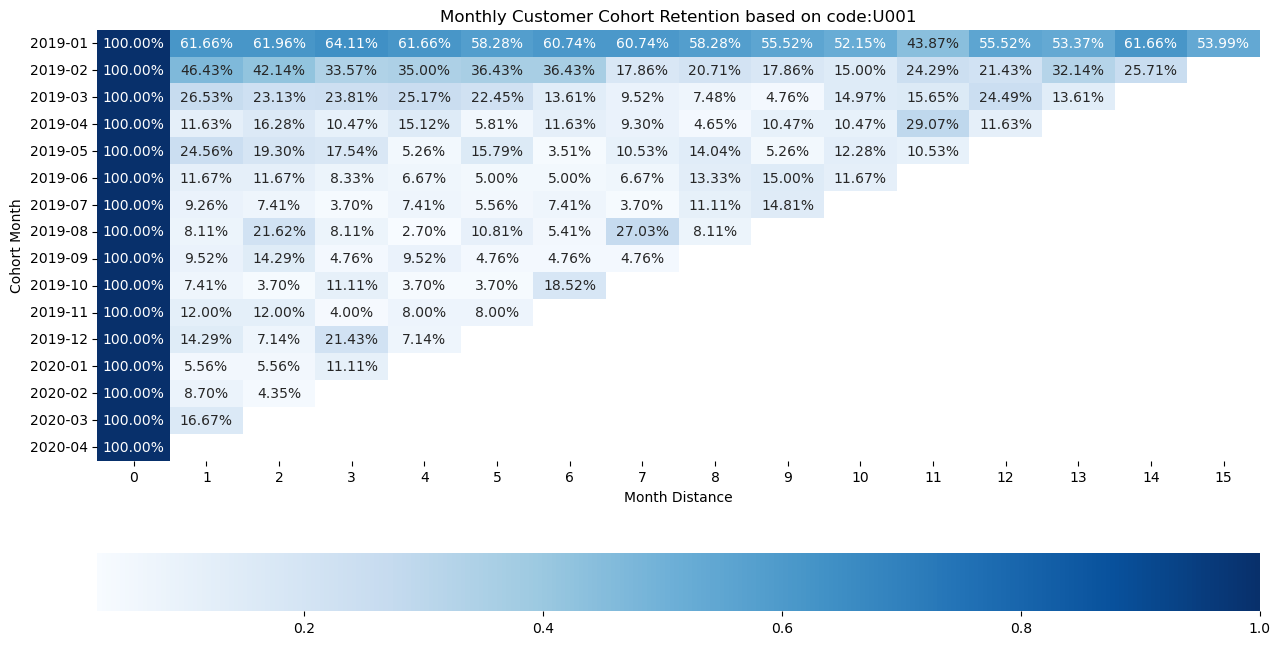

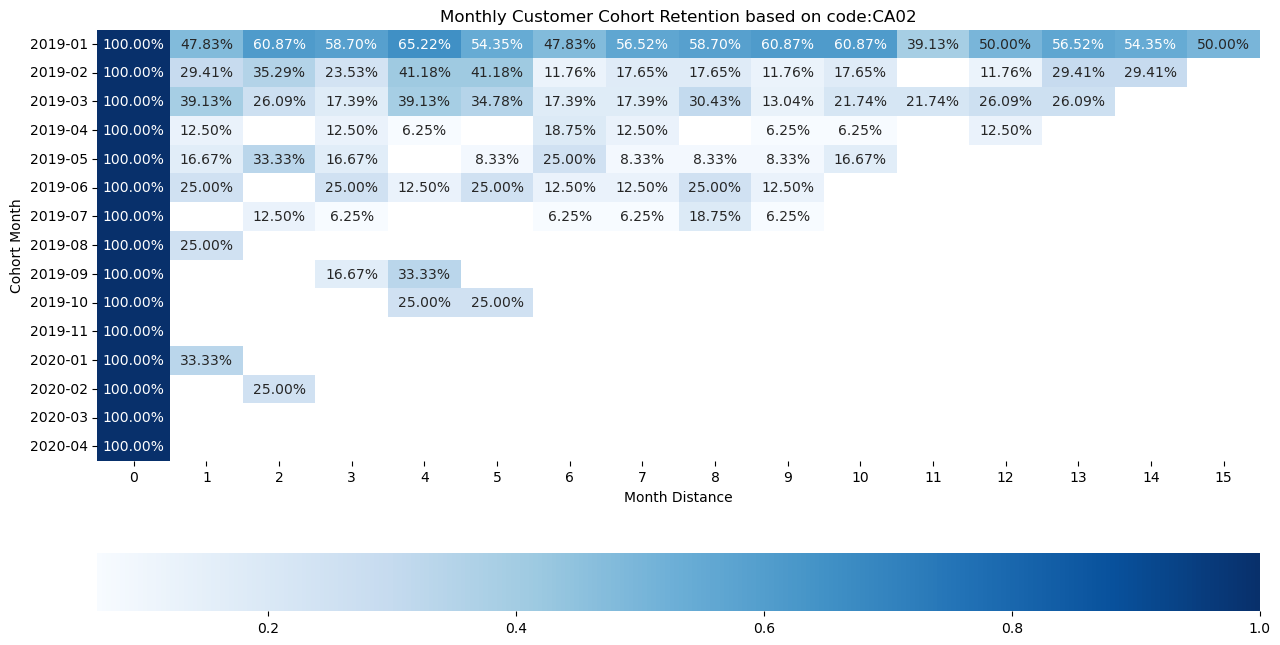

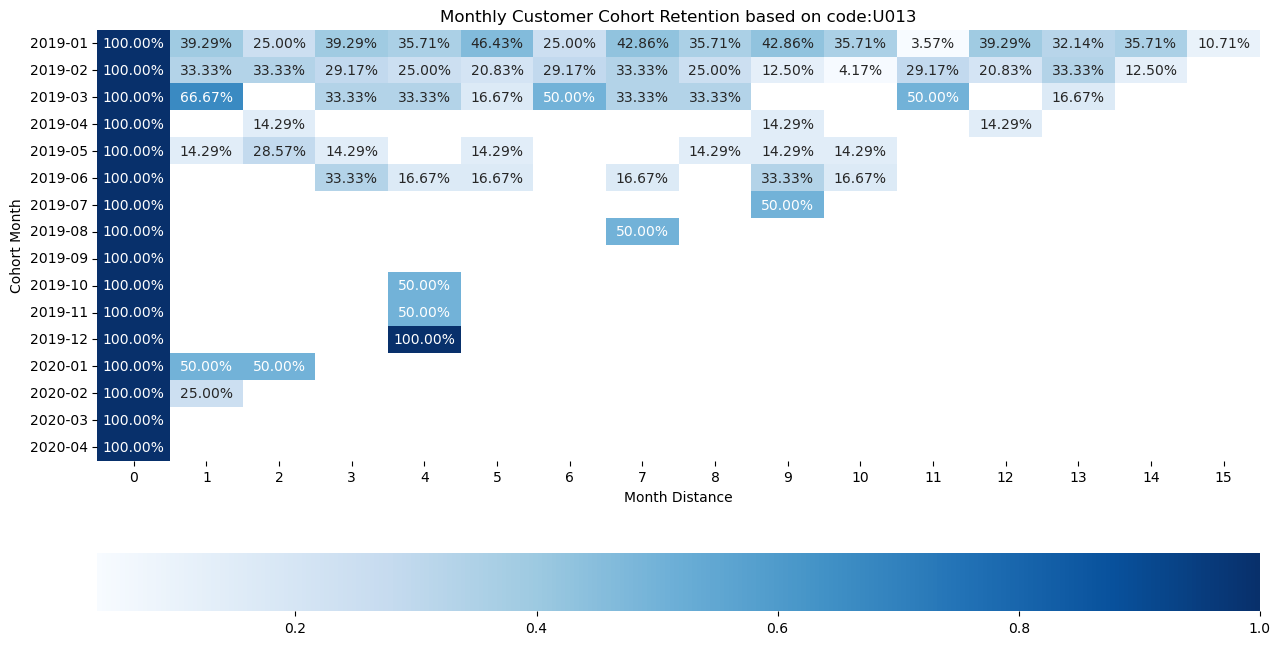

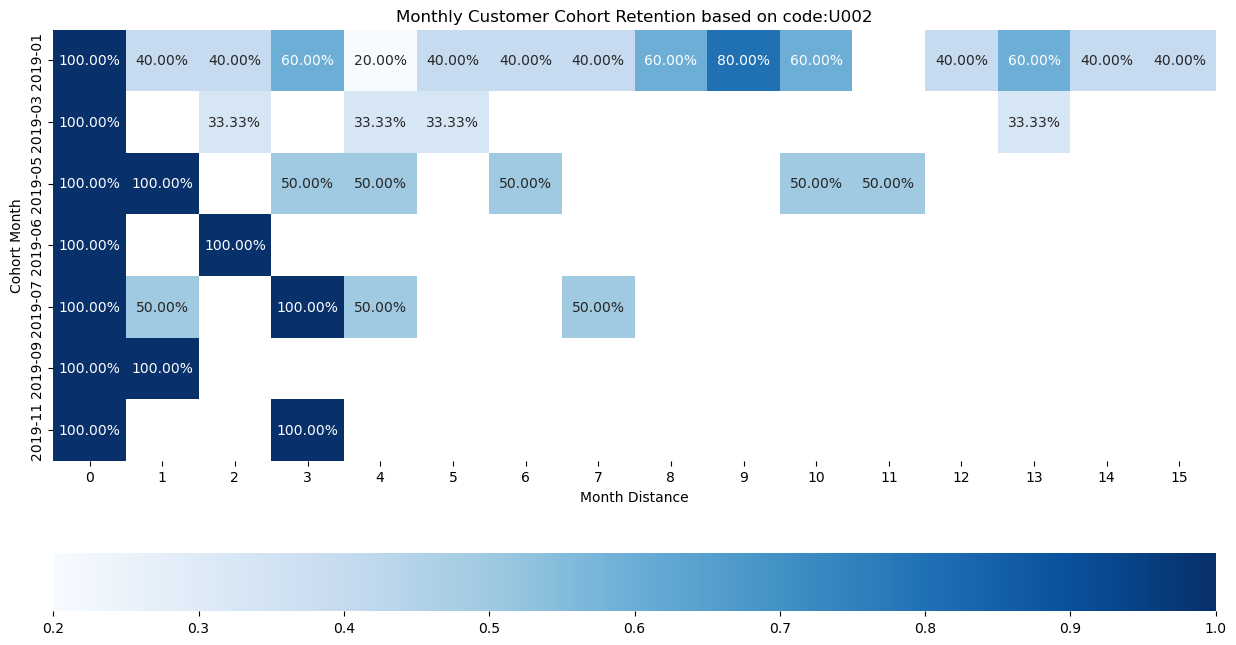

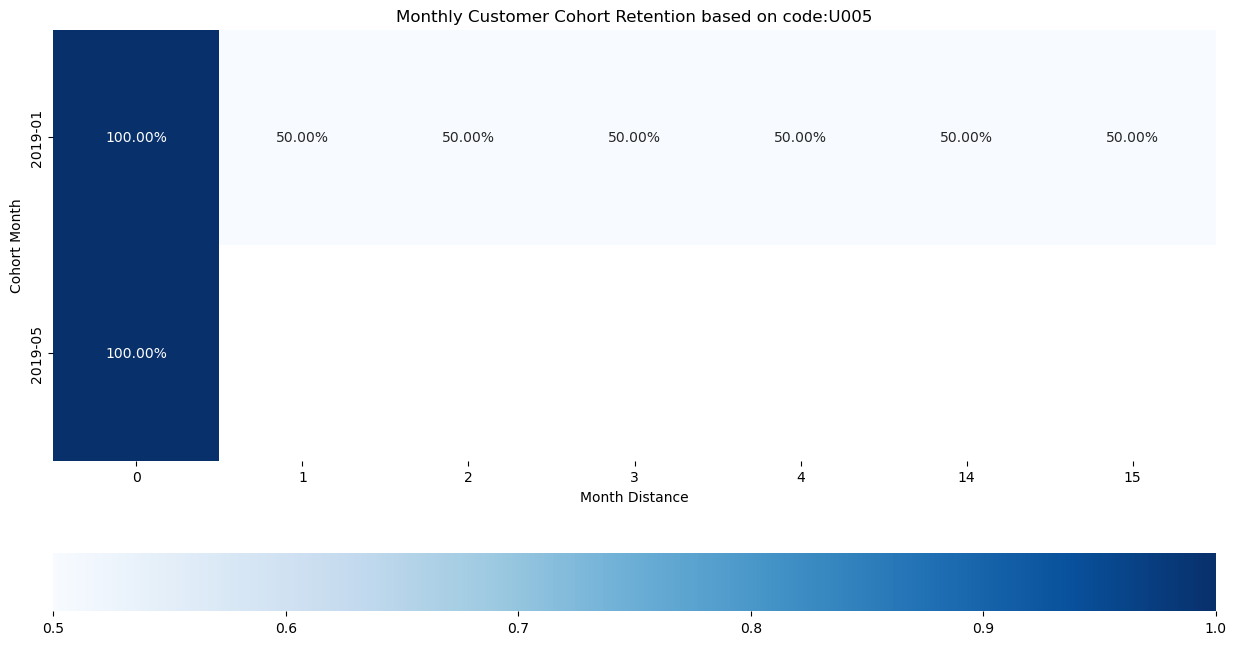

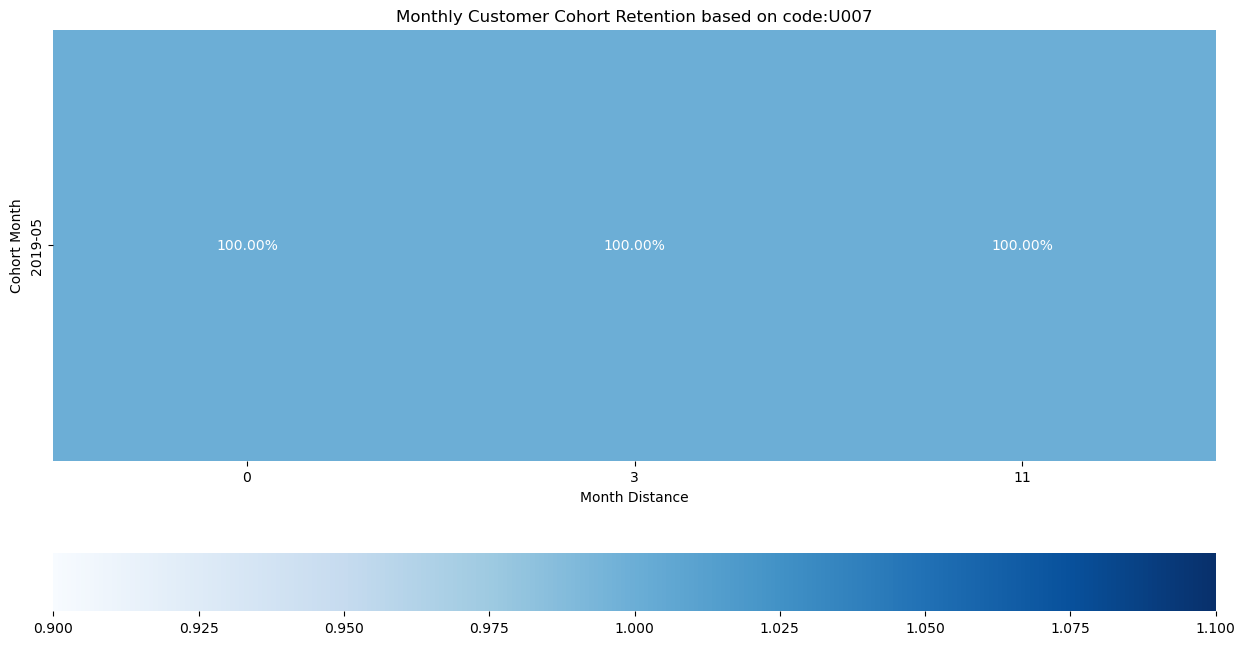

In [67]:
for i in y:
    df_cohort2 = df.copy()
    df_cohort2 = df_cohort2[df_cohort2['business_code']==i]
    #define cohort month
    df_cohort2["cohort_month"] = df_cohort2.groupby("cust_number")["posting_date"].transform("min").dt.to_period('M')
    #drop 2018-12 and 2020-05
    df_cohort2 = df_cohort2[(df_cohort2['cohort_month'] != '2018-12')&(df_cohort2['cohort_month'] != '2020-05')]
    #define current transaction period
    df_cohort2['current_transaction_month']=df_cohort2['posting_date'].dt.to_period('M')
    #drop transaction 2020-05
    df_cohort2=df_cohort2[df_cohort2['current_transaction_month']!='2020-05']
    df_cohort2=df_cohort2[['cust_number', 'cohort_month', 'current_transaction_month']]
    df_cohort2.drop_duplicates(inplace=True)
    #agregasi
    cohort_retention2=df_cohort2.groupby(['cohort_month','current_transaction_month'])['cust_number'].count().reset_index().rename(columns={'cust_number':'count_user'})
    cohort_retention2['period_distance'] = (
        (cohort_retention2['current_transaction_month'].dt.year - cohort_retention2['cohort_month'].dt.year) * 12 +
        (cohort_retention2['current_transaction_month'].dt.month - cohort_retention2['cohort_month'].dt.month))
    #pivot
    cohort_retention_pivot2=cohort_retention2.pivot_table(index='cohort_month',columns='period_distance',values='count_user')
    # retention to percentage
    cohort_retention_final2 = cohort_retention_pivot2.div(cohort_retention_pivot2.iloc[:, 0], axis=0)
    #create heatmap
    plt.figure(figsize=(15,8))
    sns.heatmap(data=cohort_retention_final2,annot=True,fmt='.2%',
               cbar_kws={'orientation':'horizontal'},
               cmap='Blues')
    plt.title(f'Monthly Customer Cohort Retention based on code:{i}')
    plt.xlabel('Month Distance')
    plt.ylabel('Cohort Month')
    plt.show()
    
    
    

# cohort based on currency

Analisis retensi pelanggan berdasarkan `invoice_currency`

In [70]:
x = pd.DataFrame(df['invoice_currency'].value_counts()).reset_index()
y = list(x['invoice_currency'])
y

['USD', 'CAD']

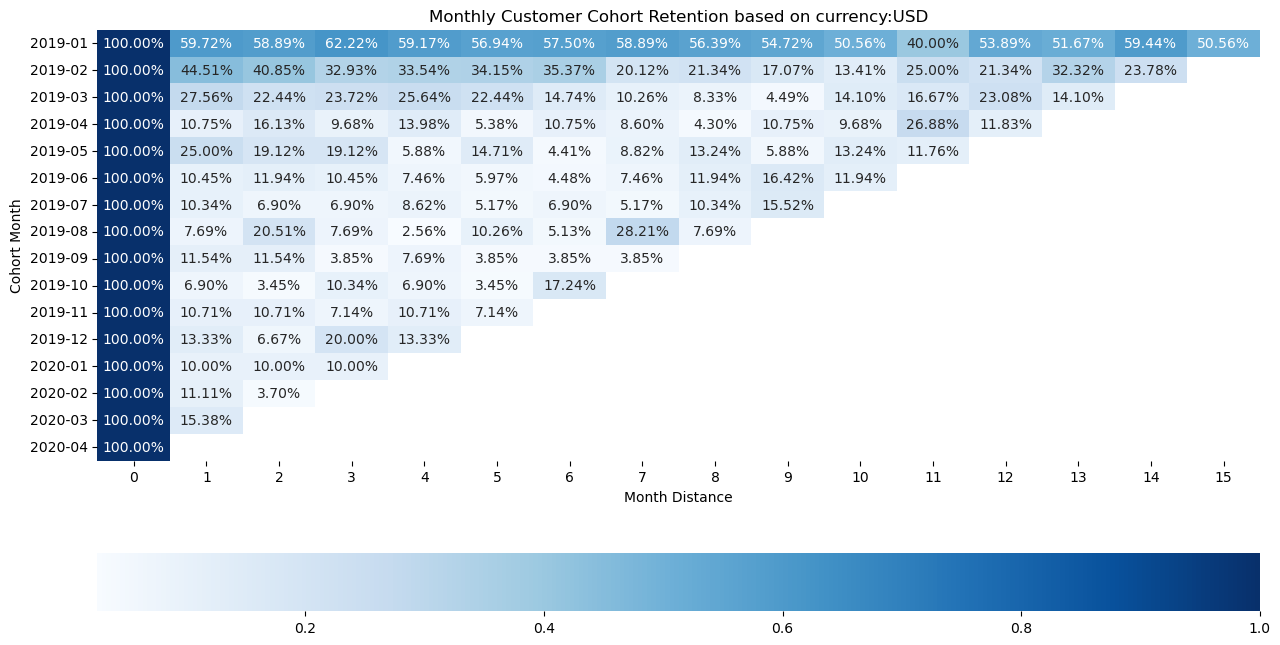

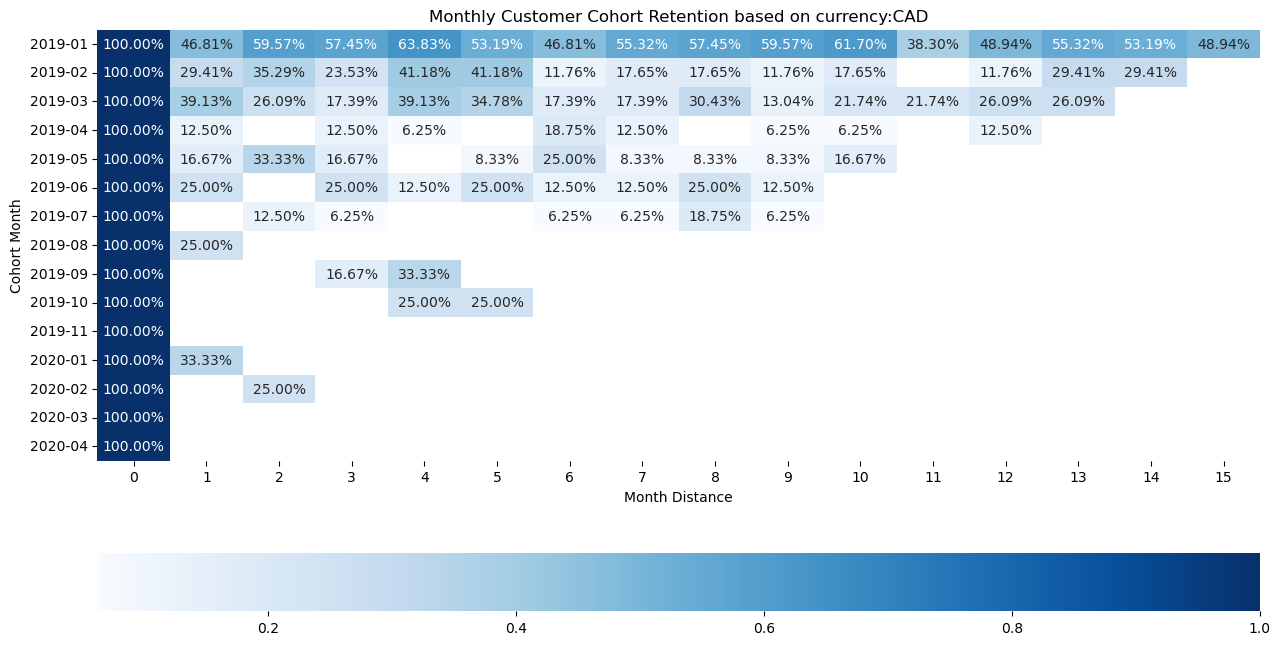

In [71]:
for i in y:
    df_cohort2 = df.copy()
    df_cohort2 = df_cohort2[df_cohort2['invoice_currency']==i]
    #define cohort month
    df_cohort2["cohort_month"] = df_cohort2.groupby("cust_number")["posting_date"].transform("min").dt.to_period('M')
    #drop 2018-12 
    df_cohort2 = df_cohort2[(df_cohort2['cohort_month'] != '2018-12')&(df_cohort2['cohort_month'] != '2020-05')]
    #define current transaction period
    df_cohort2['current_transaction_month']=df_cohort2['posting_date'].dt.to_period('M')
    #drop transaction 2020-05
    df_cohort2=df_cohort2[df_cohort2['current_transaction_month']!='2020-05']
    df_cohort2=df_cohort2[['cust_number', 'cohort_month', 'current_transaction_month']]
    df_cohort2.drop_duplicates(inplace=True)
    #agregasi
    cohort_retention2=df_cohort2.groupby(['cohort_month','current_transaction_month'])['cust_number'].count().reset_index().rename(columns={'cust_number':'count_user'})
    cohort_retention2['period_distance'] = (
        (cohort_retention2['current_transaction_month'].dt.year - cohort_retention2['cohort_month'].dt.year) * 12 +
        (cohort_retention2['current_transaction_month'].dt.month - cohort_retention2['cohort_month'].dt.month))
    #pivot
    cohort_retention_pivot2=cohort_retention2.pivot_table(index='cohort_month',columns='period_distance',values='count_user')
    # retention to percentage
    cohort_retention_final2 = cohort_retention_pivot2.div(cohort_retention_pivot2.iloc[:, 0], axis=0)
    #create heatmap
    plt.figure(figsize=(15,8))
    sns.heatmap(data=cohort_retention_final2,annot=True,fmt='.2%',
               cbar_kws={'orientation':'horizontal'},
               cmap='Blues')
    plt.title(f'Monthly Customer Cohort Retention based on currency:{i}')
    plt.xlabel('Month Distance')
    plt.ylabel('Cohort Month')
    plt.show()

# cohort based on payment term

analisis retensi pelanggan berdasarkan `cust_payment_terms`

In [74]:
x = pd.DataFrame(df['cust_payment_terms'].value_counts()).reset_index()
y = list(x['cust_payment_terms'])
y

['NAA8',
 'NAH4',
 'CA10',
 'NAC6',
 'NAM4',
 'NAAX',
 'NAD1',
 'NAGD',
 'NAU5',
 'NAG2',
 'NA32',
 'NAX2',
 'NAM2',
 'NA10',
 'NAD5',
 'NAVE',
 'NAM1',
 'NAVF',
 'NAAW',
 'NAWU',
 'NAVQ',
 'NAWN',
 'NAVR',
 'NAWP',
 'NAUZ',
 'CA30',
 'NA3B',
 'NABG',
 'NACB',
 'NAVM',
 'NA38',
 'NAD4',
 'NAB1',
 'NAVD',
 'NA84',
 'NAUP',
 'NAVL',
 'C106',
 'BR56',
 'NA3F',
 'CAB1',
 'NA9X',
 'CAX2',
 'NAM3',
 'NATM',
 '90M7',
 'NACH',
 'NA25',
 'NATJ',
 'NA8Q',
 'NAVC',
 'NATW',
 'B052',
 'NAV9',
 'NAV2',
 'NAD8',
 'NAWM',
 'NATH',
 'NATX',
 'NATZ',
 'NATL',
 'BR12',
 'NACE',
 'NA31',
 'NABD',
 'NAUW',
 'NACG',
 'CA60',
 'NATK',
 'NATU',
 'NAUY',
 'C129',
 'NATV',
 'MC15']

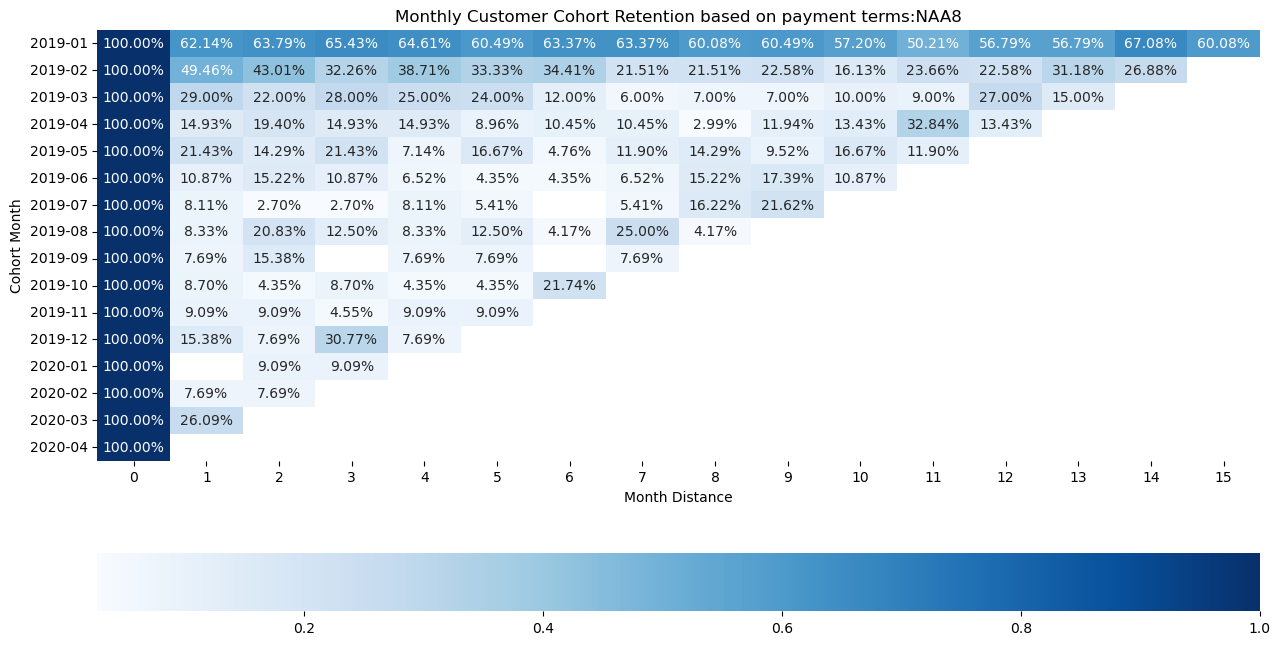

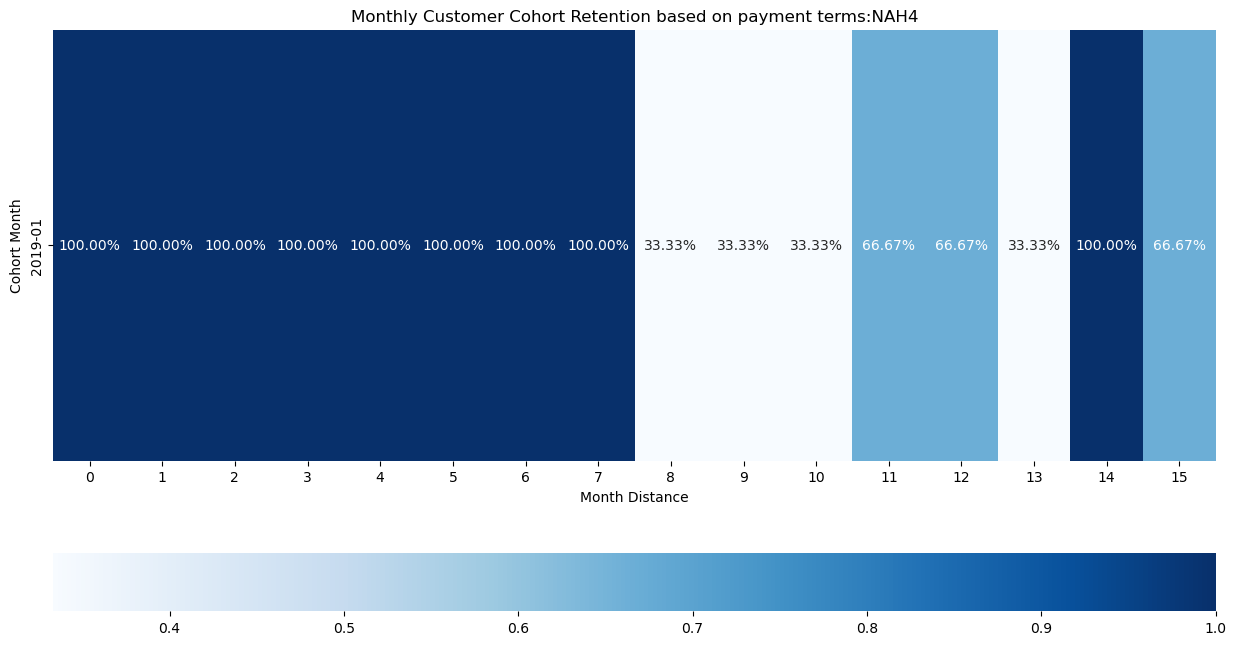

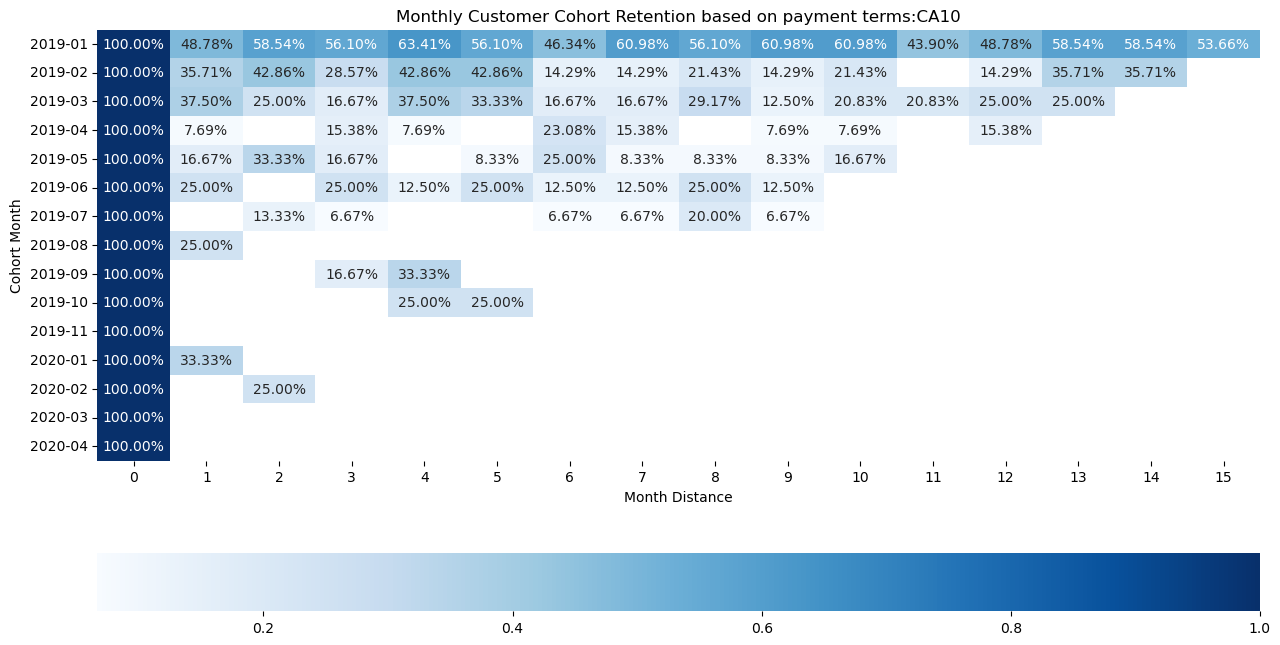

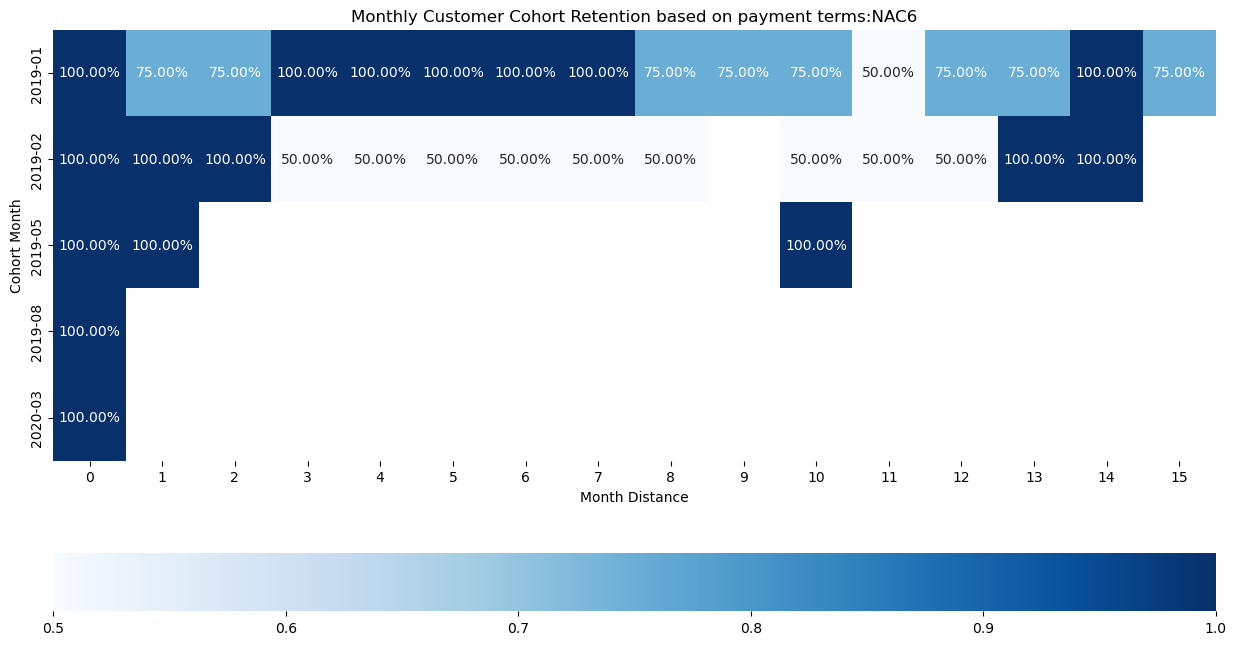

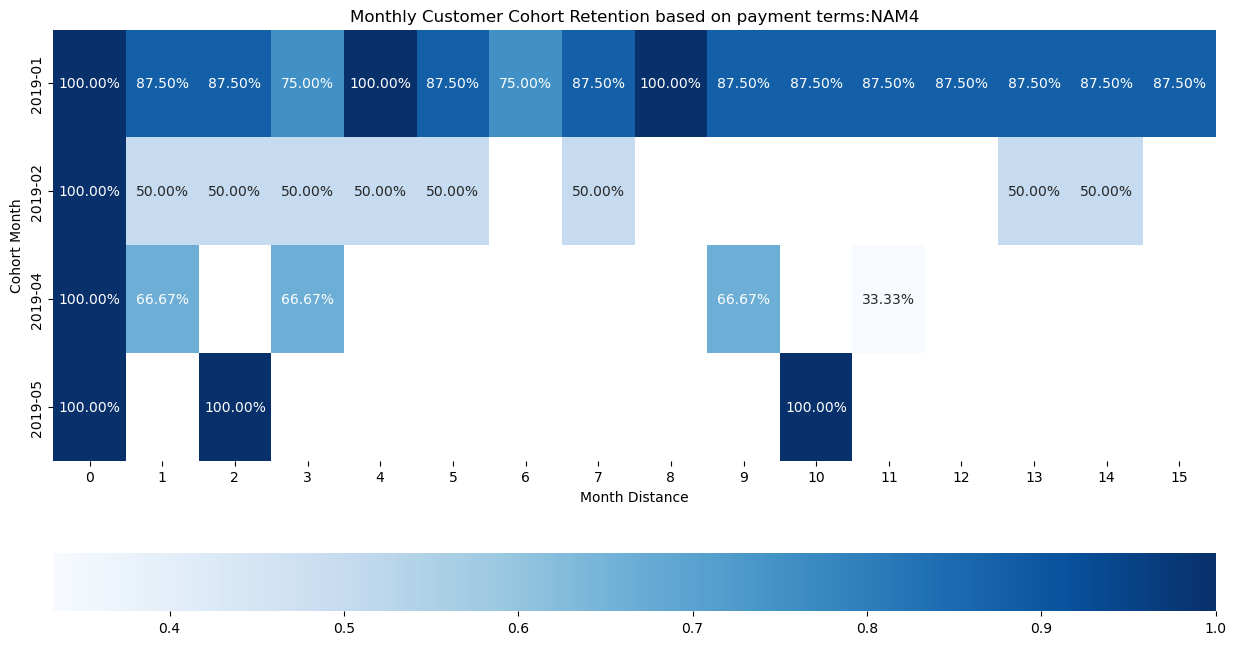

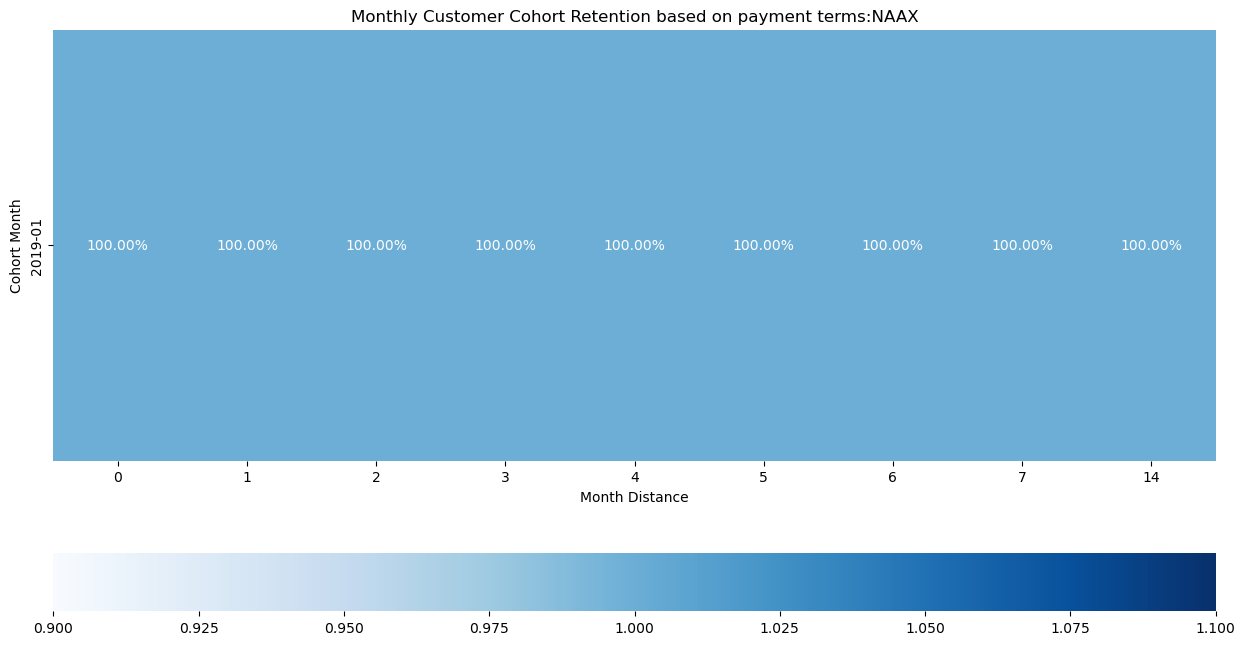

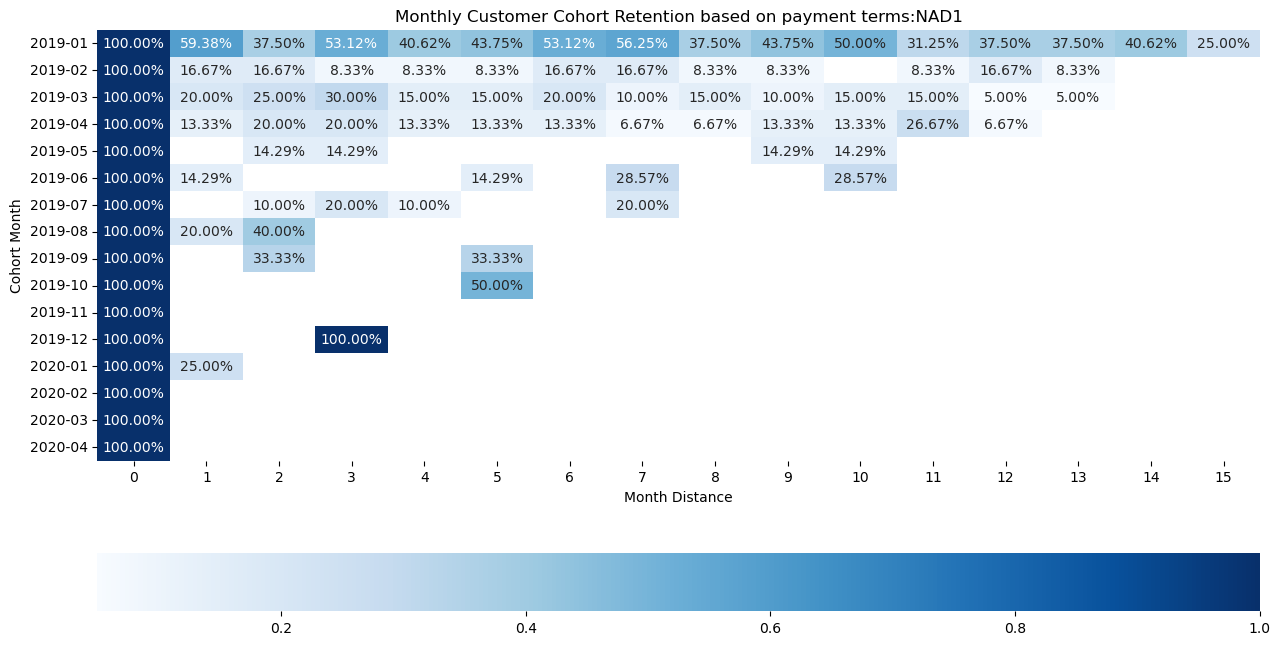

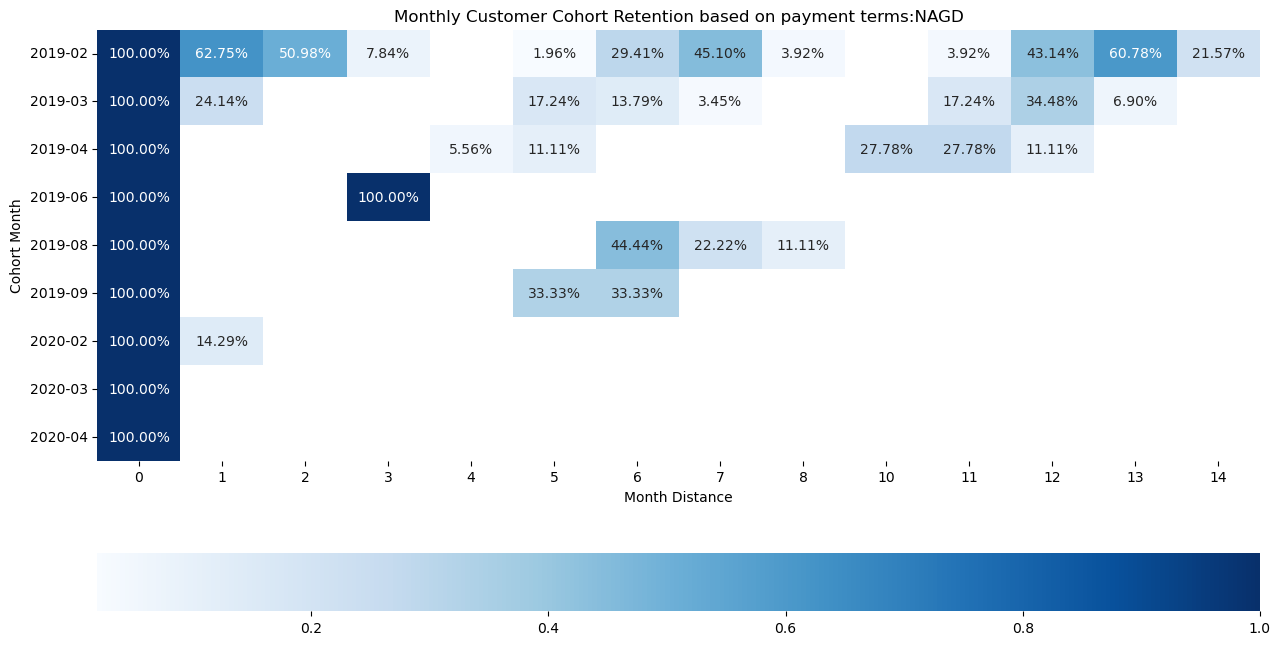

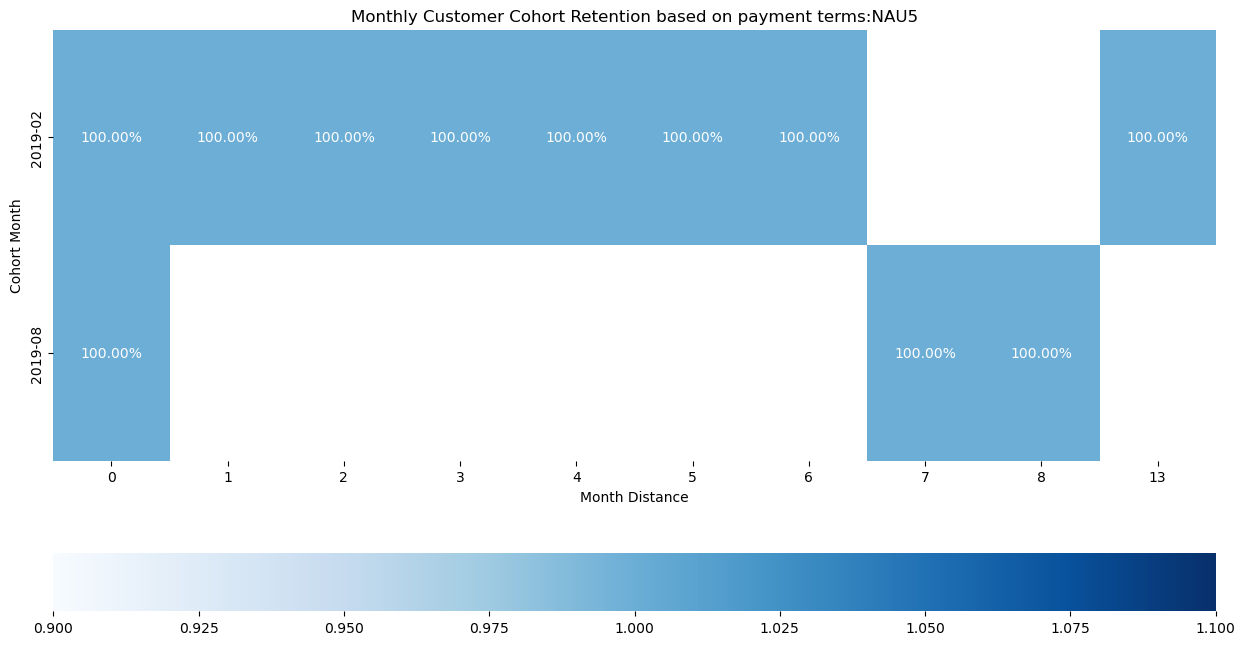

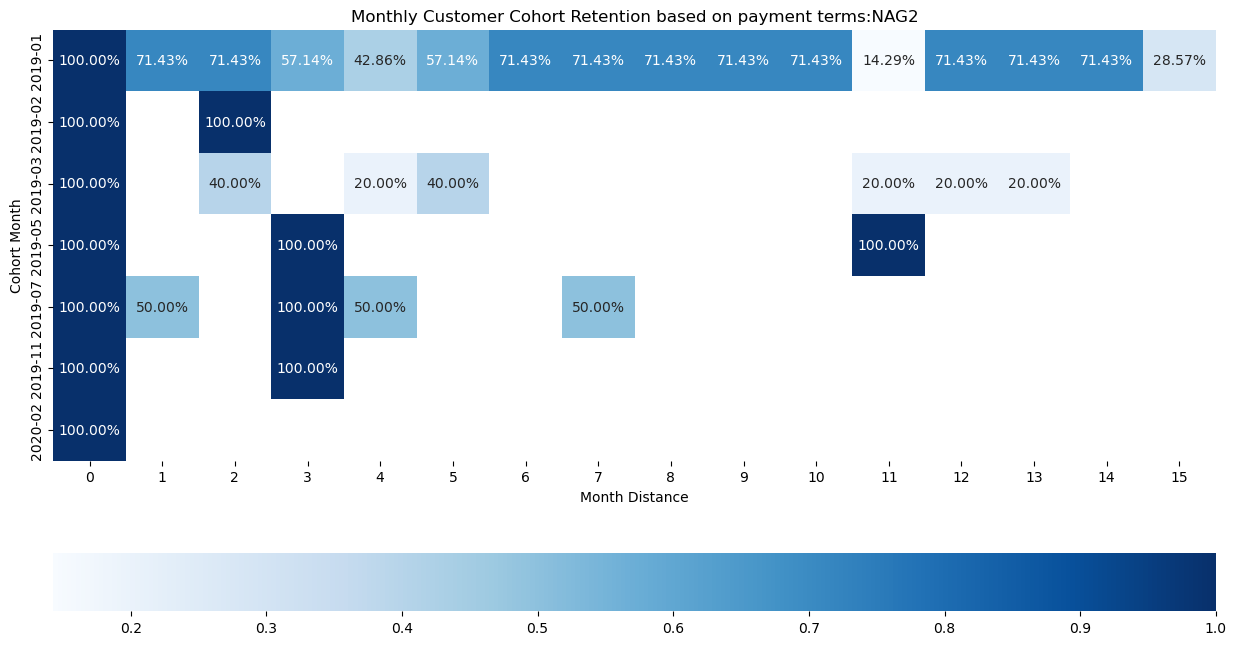

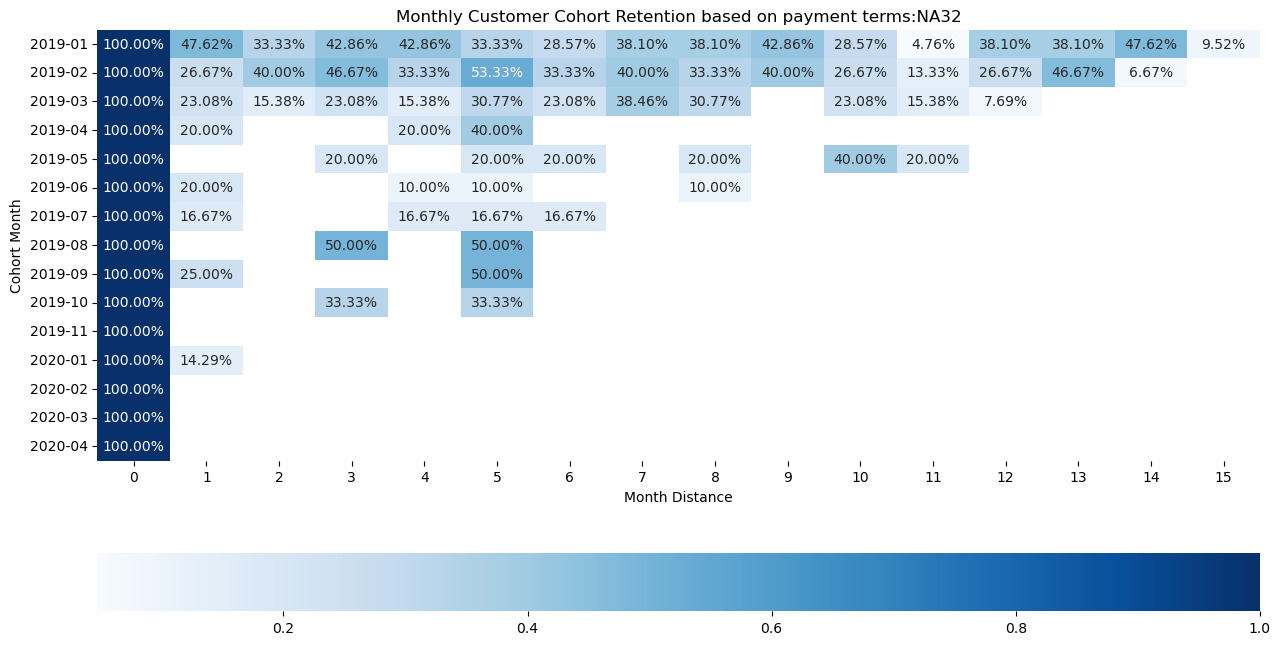

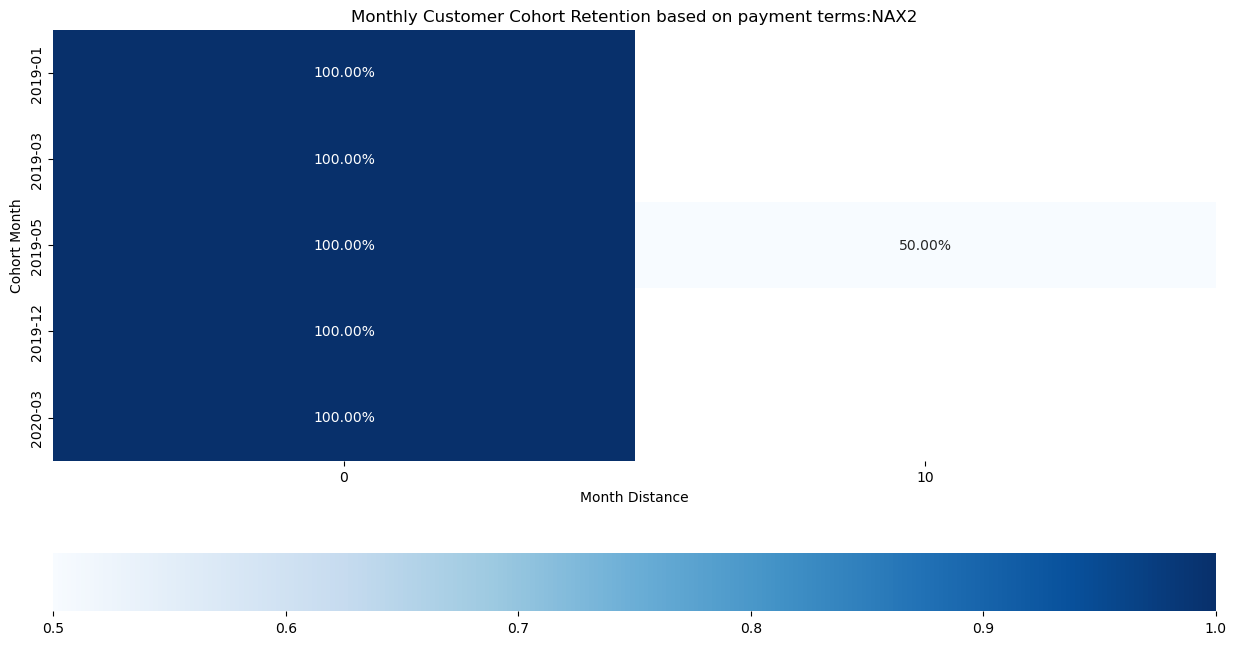

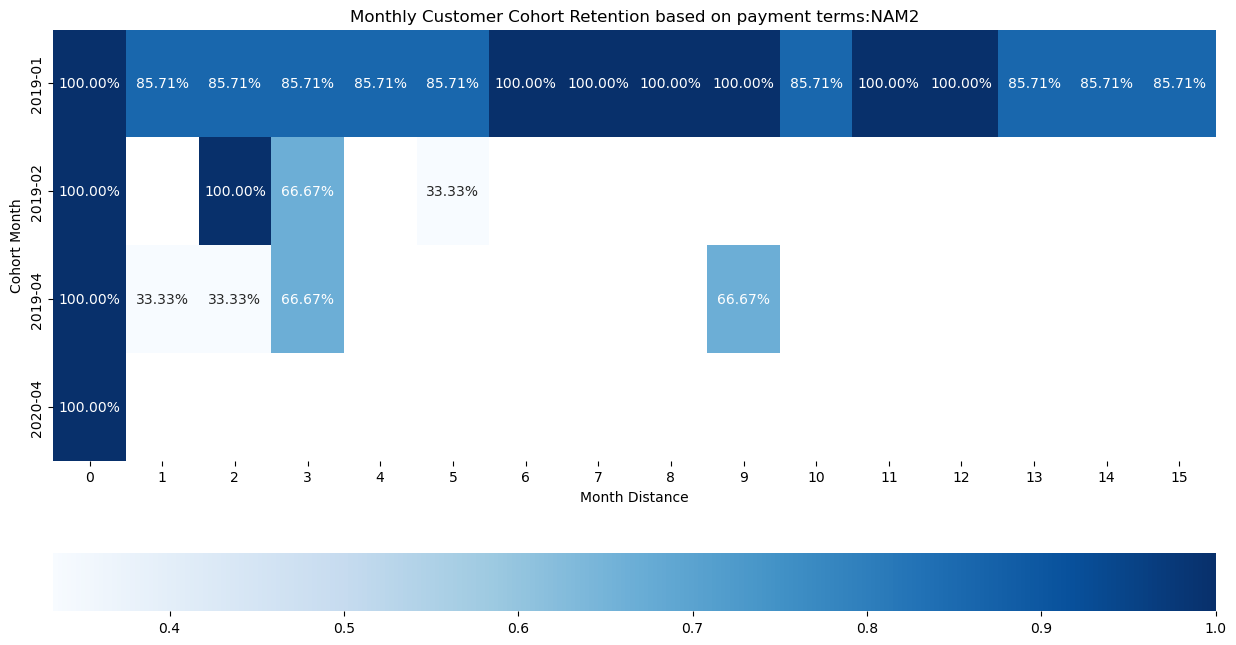

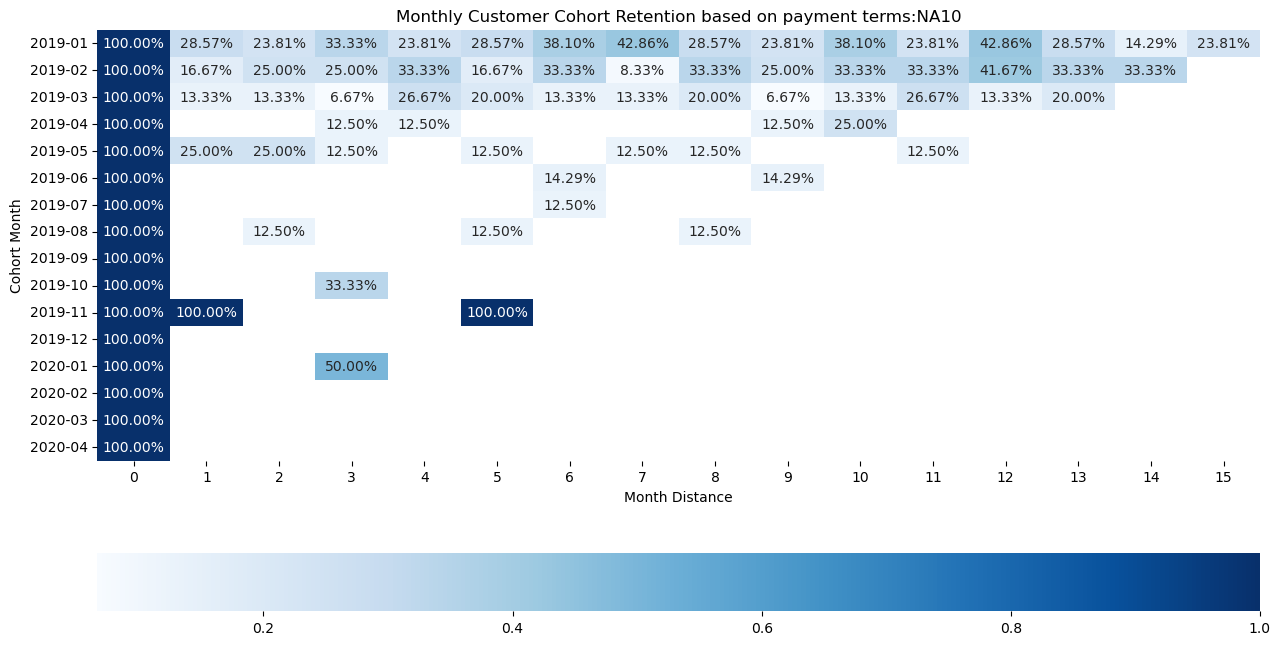

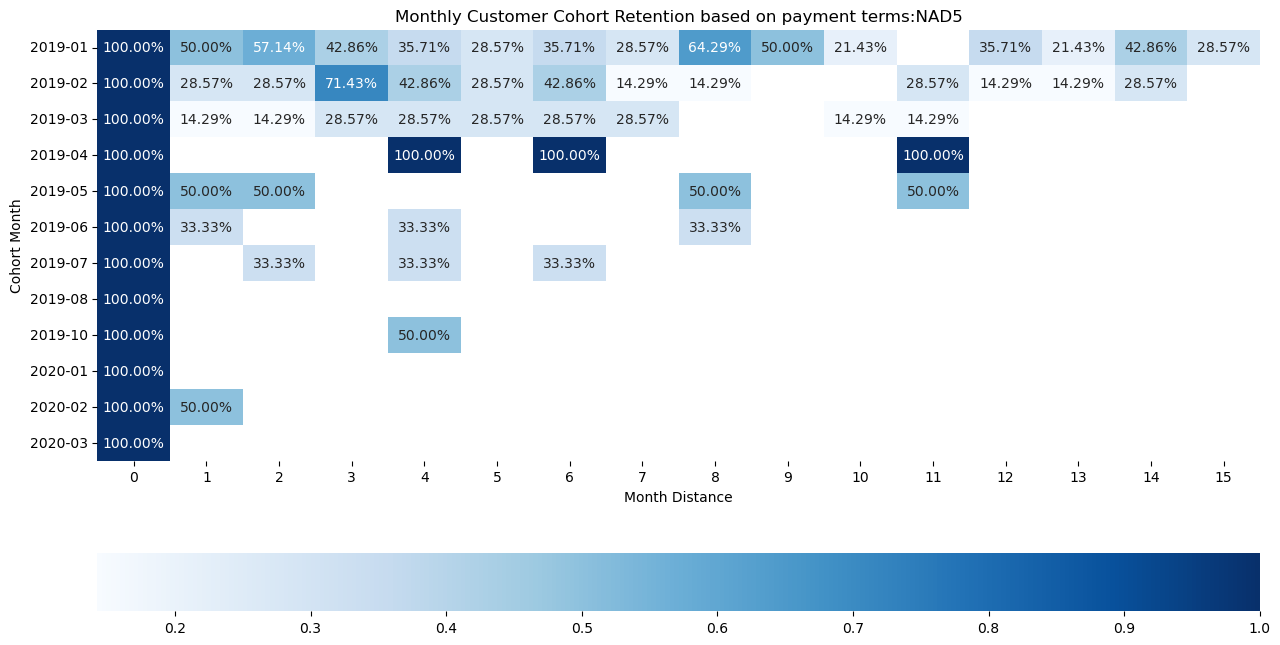

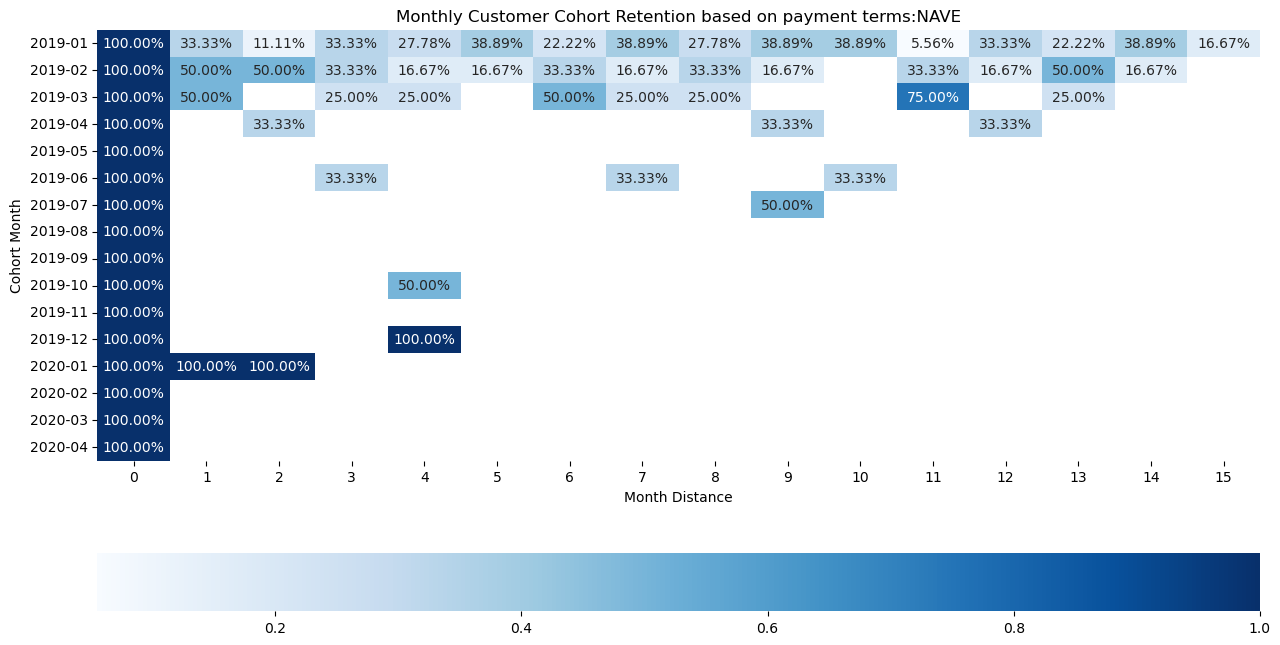

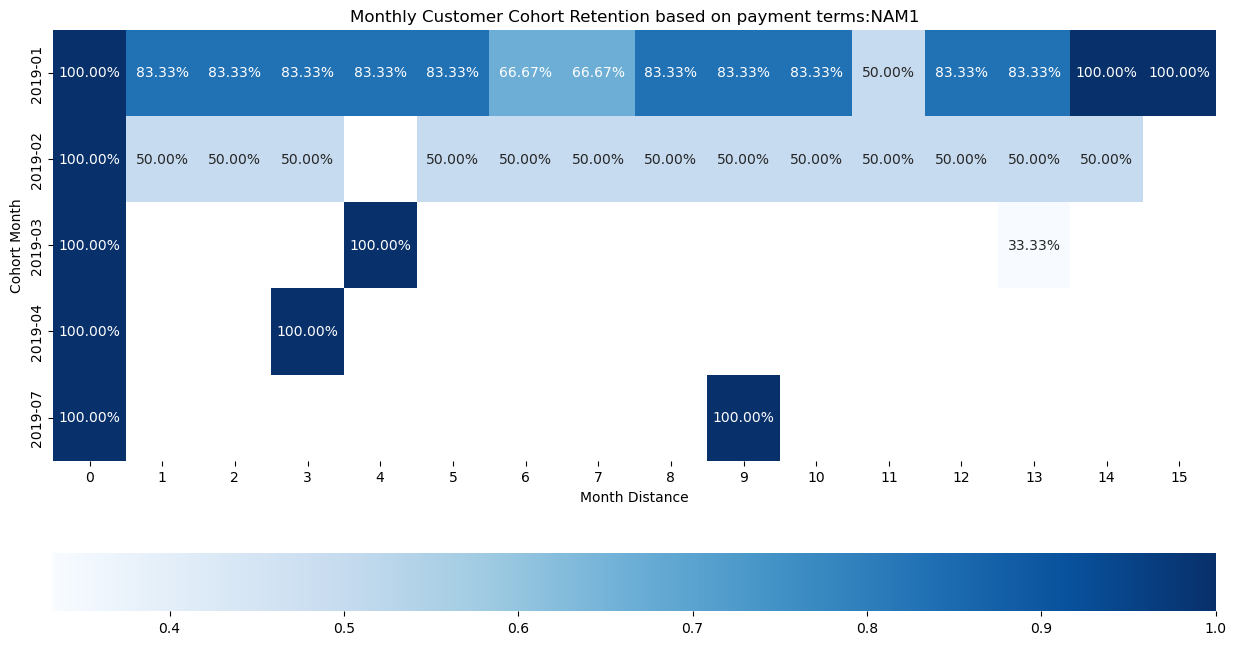

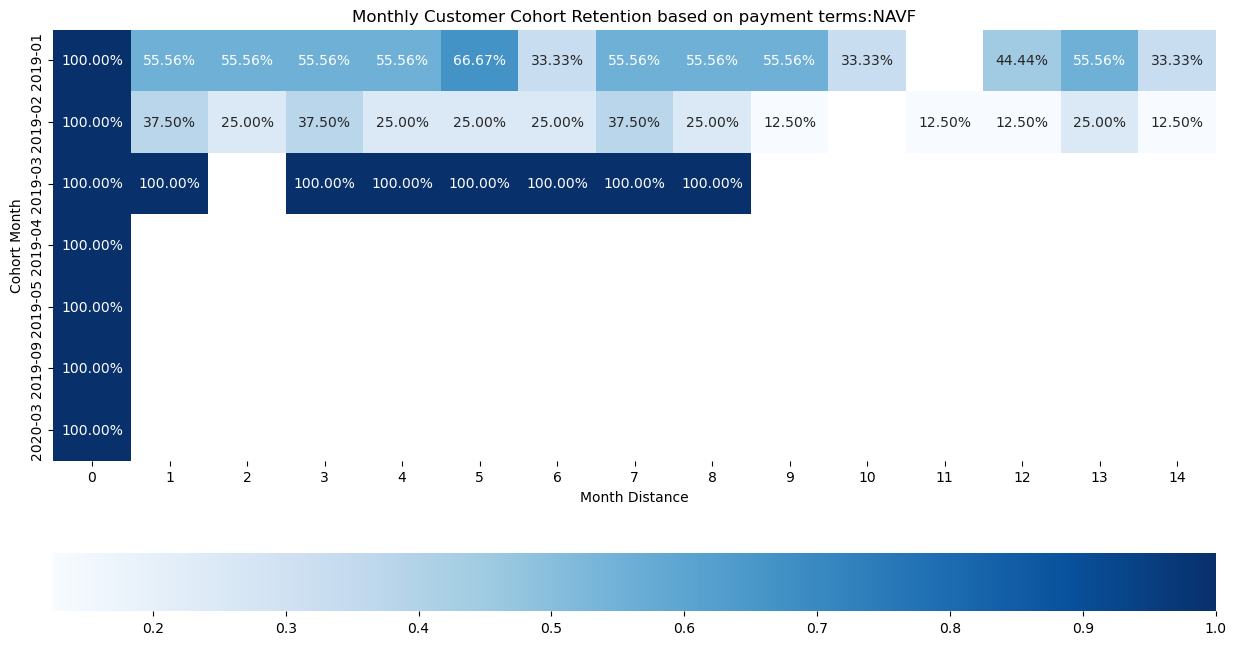

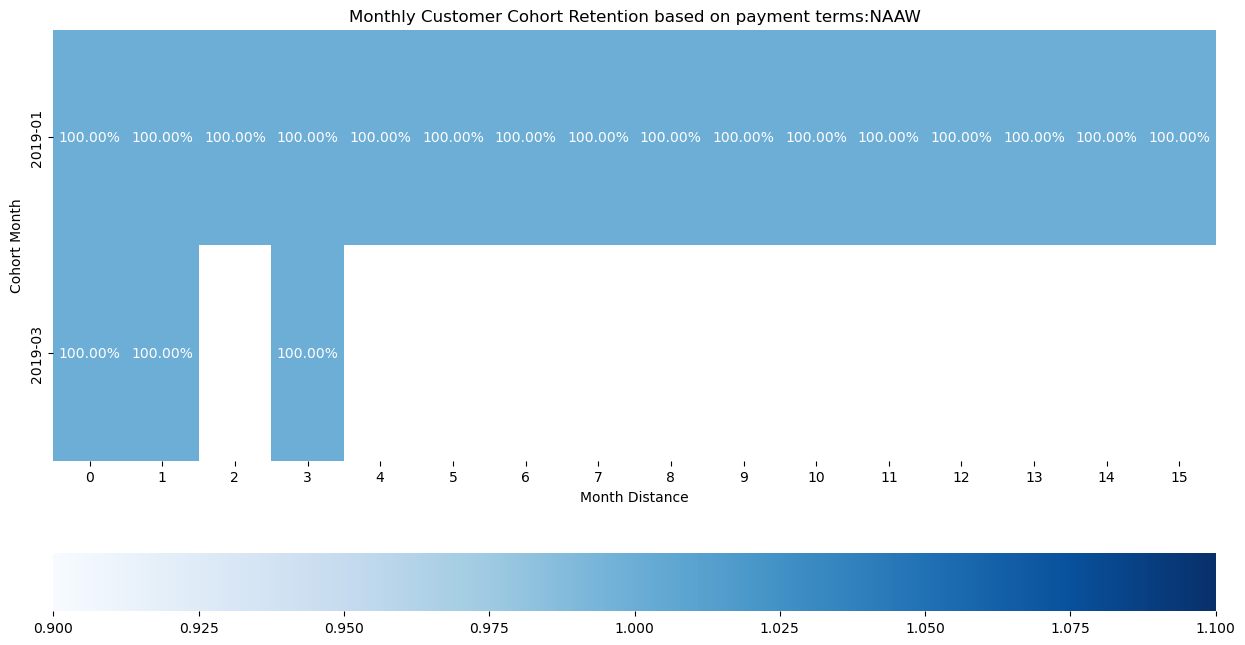

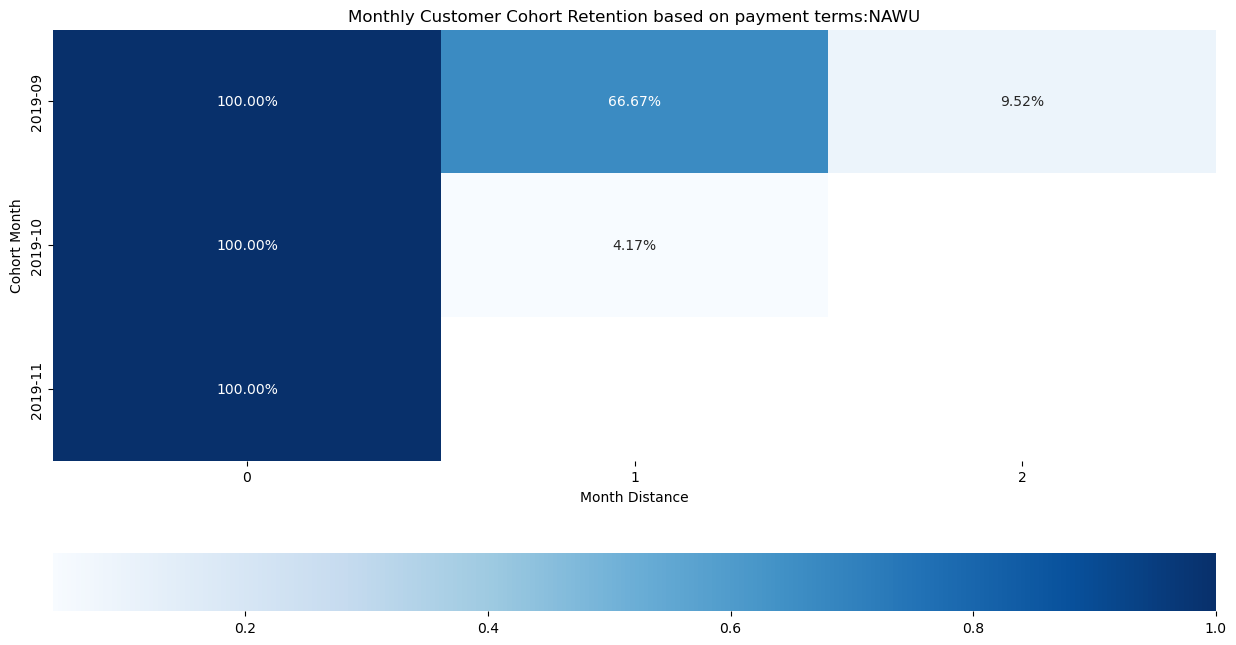

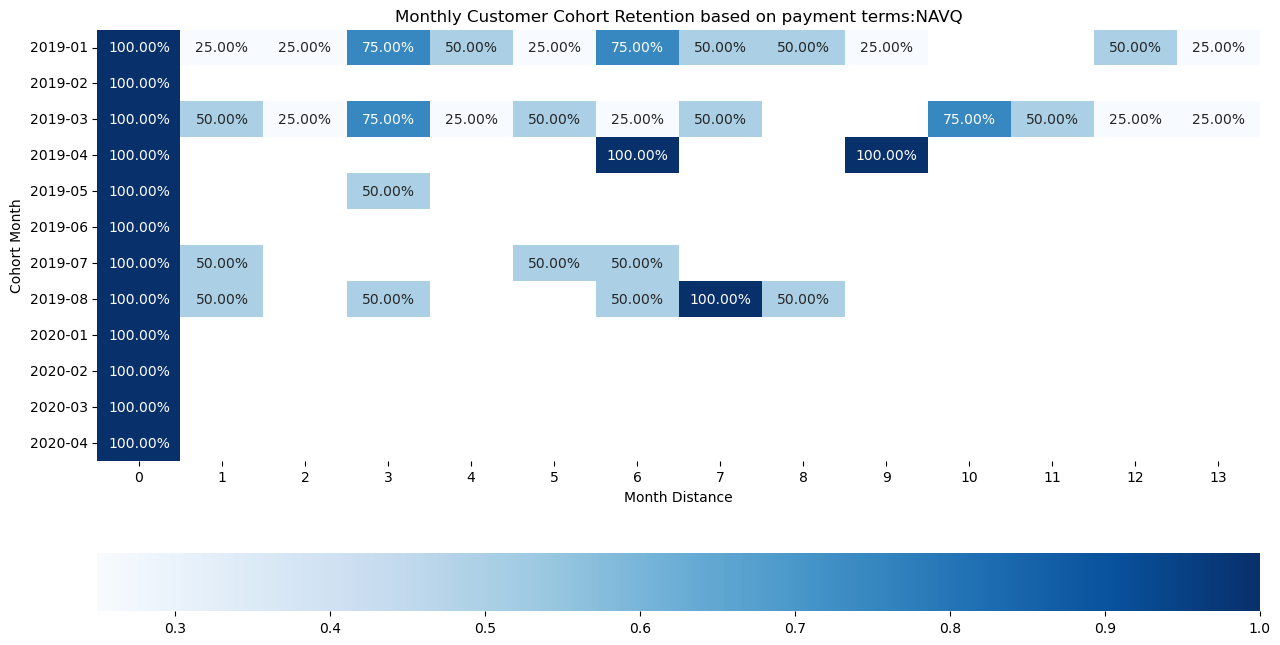

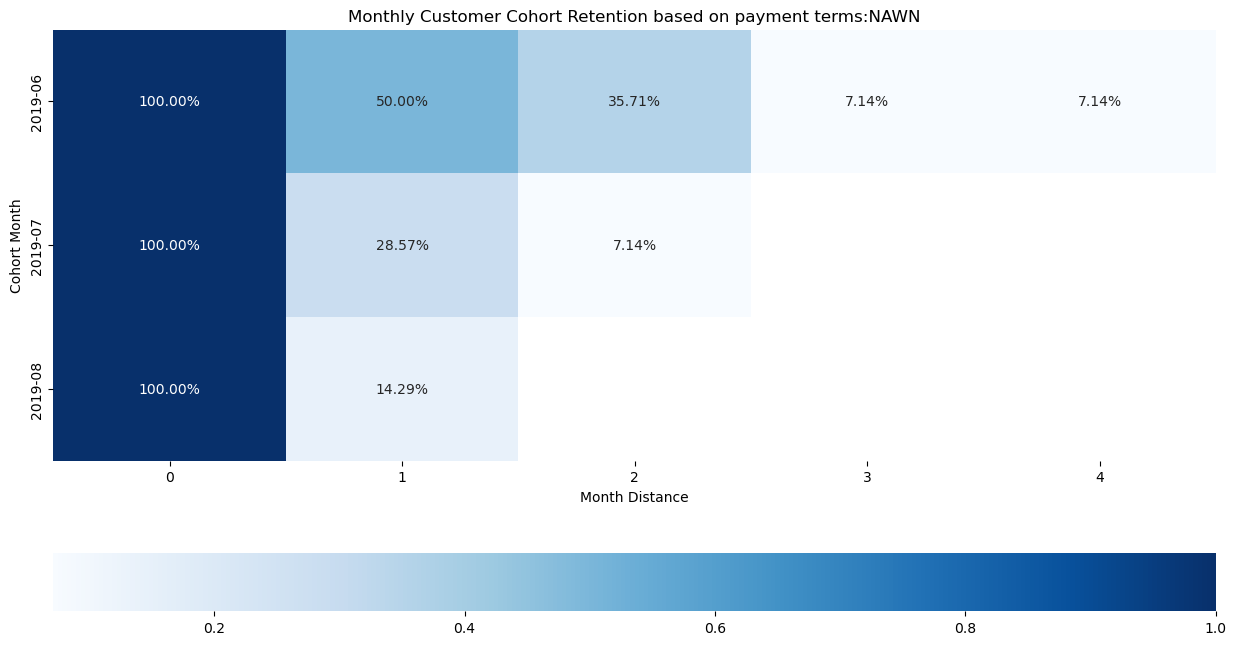

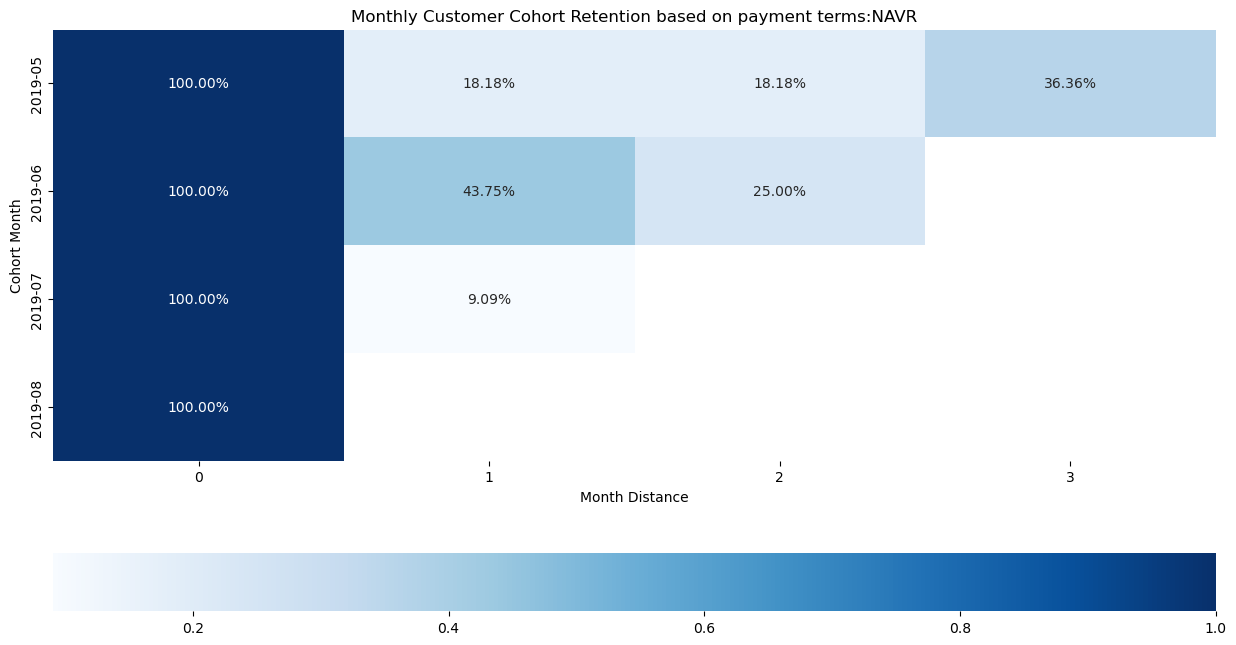

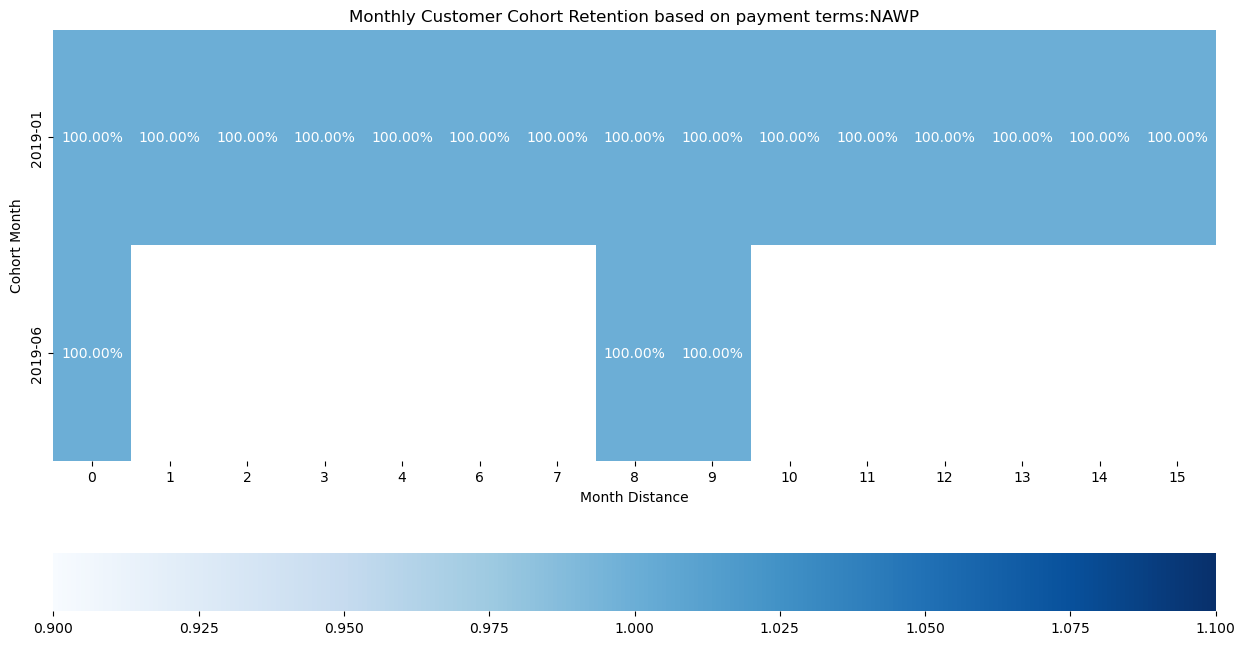

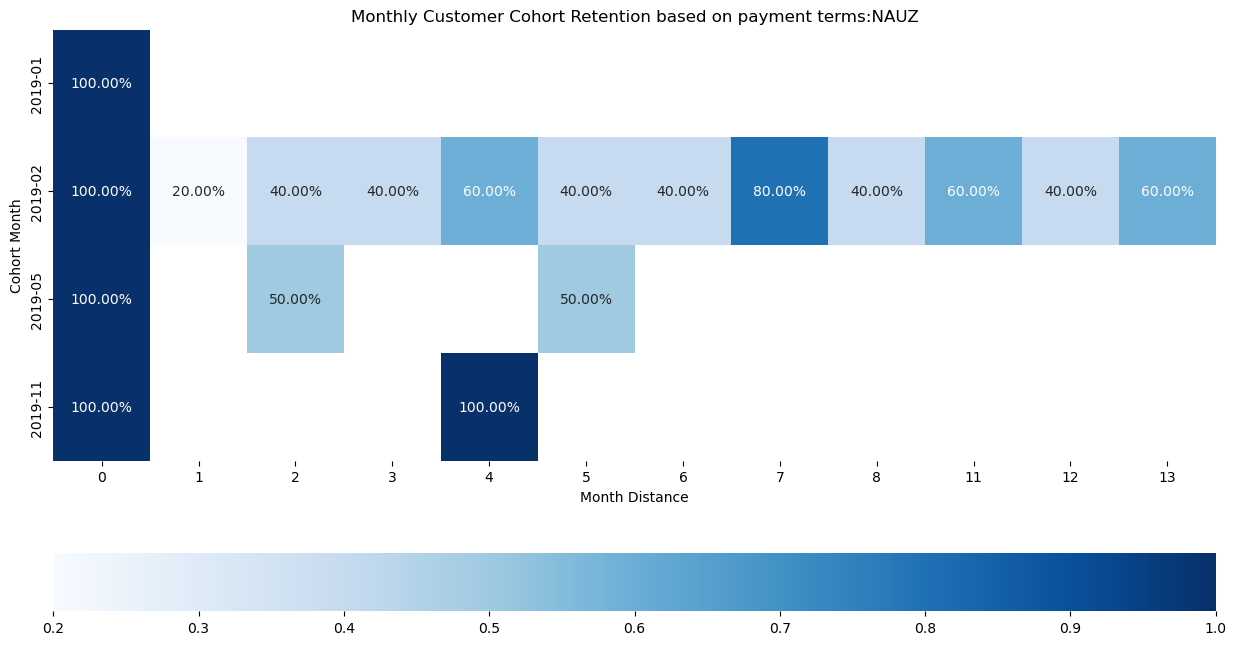

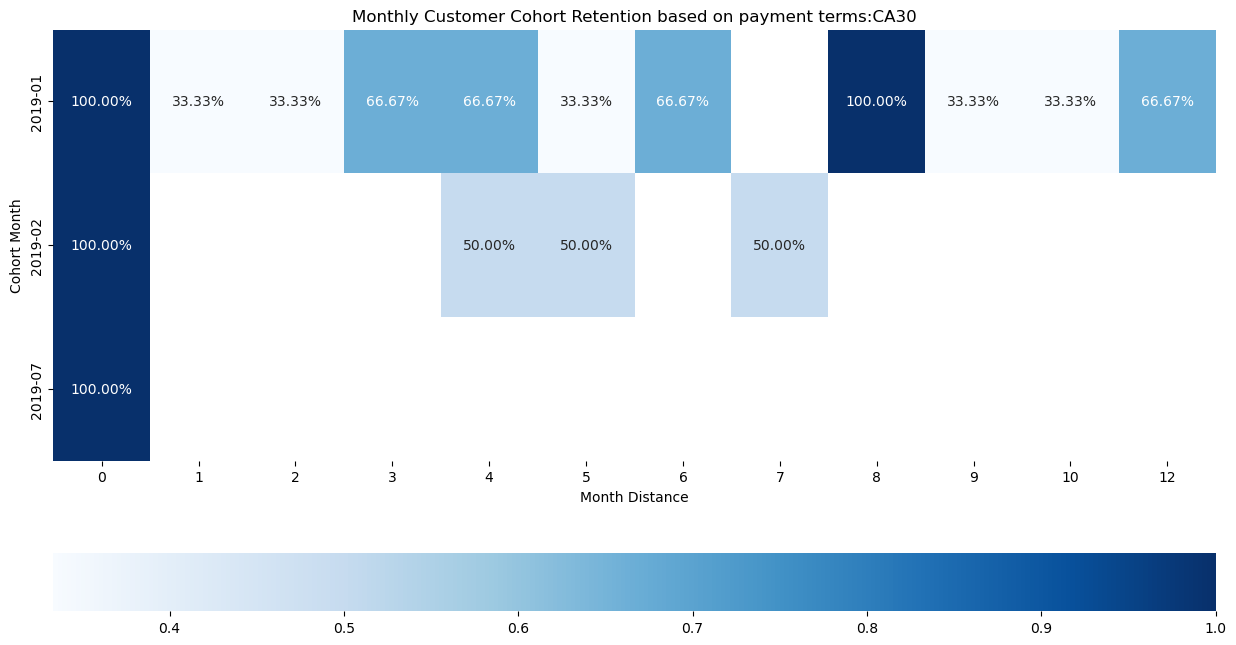

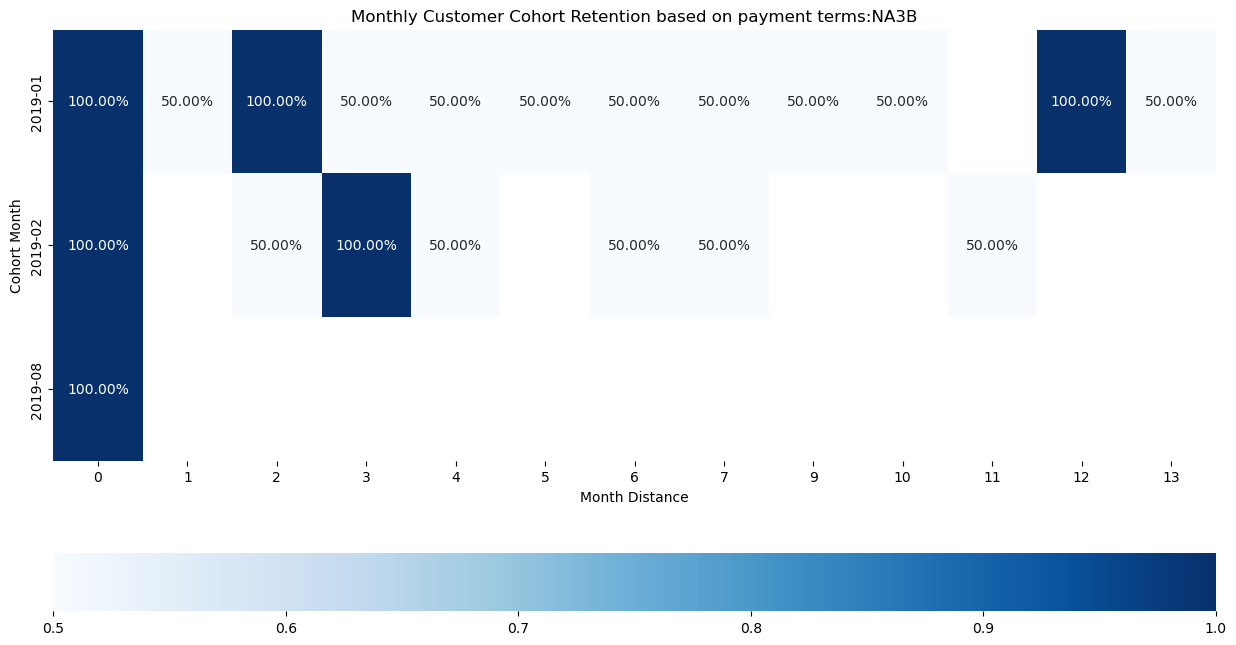

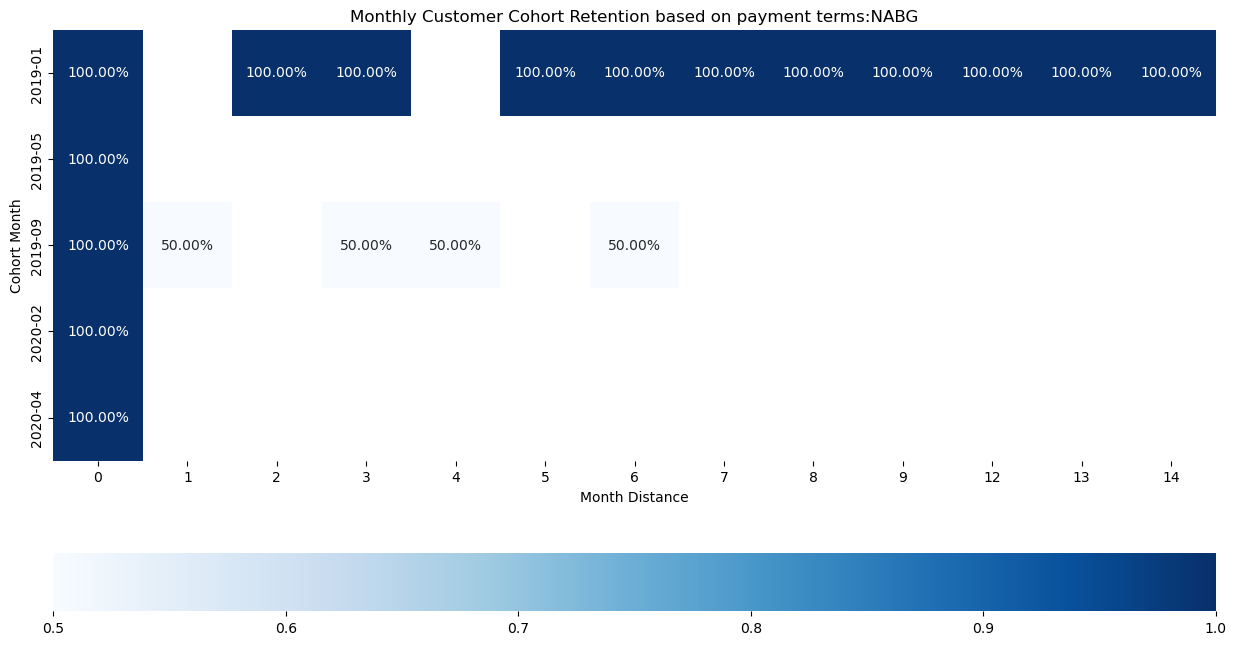

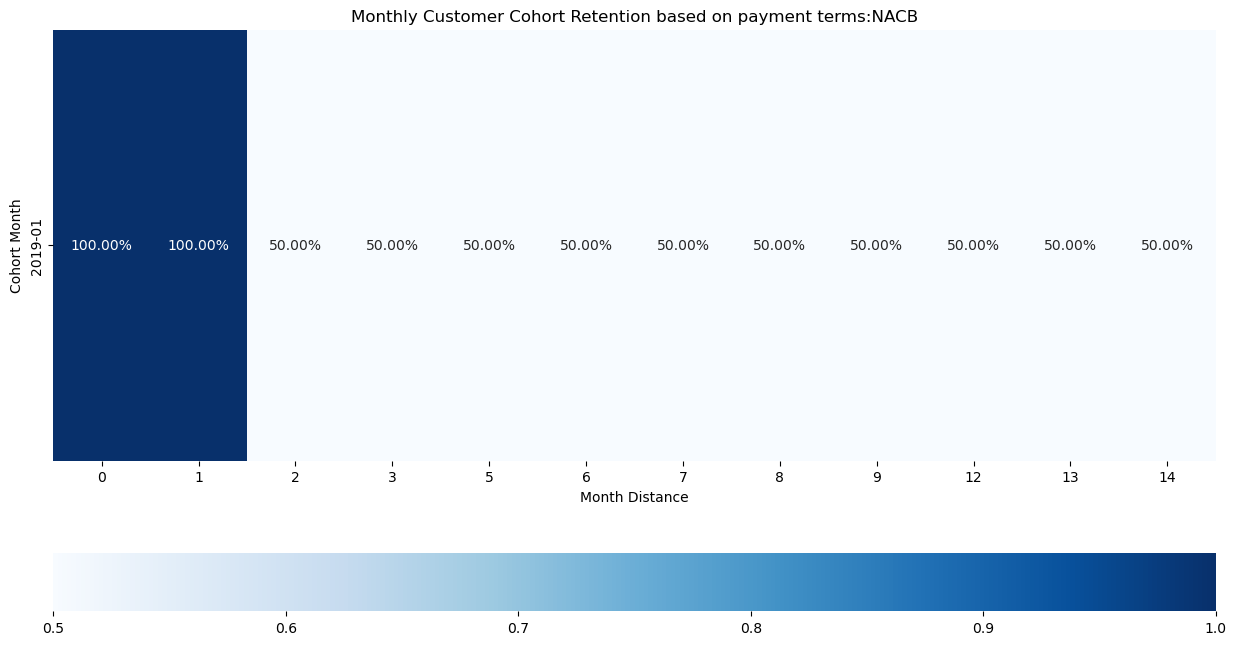

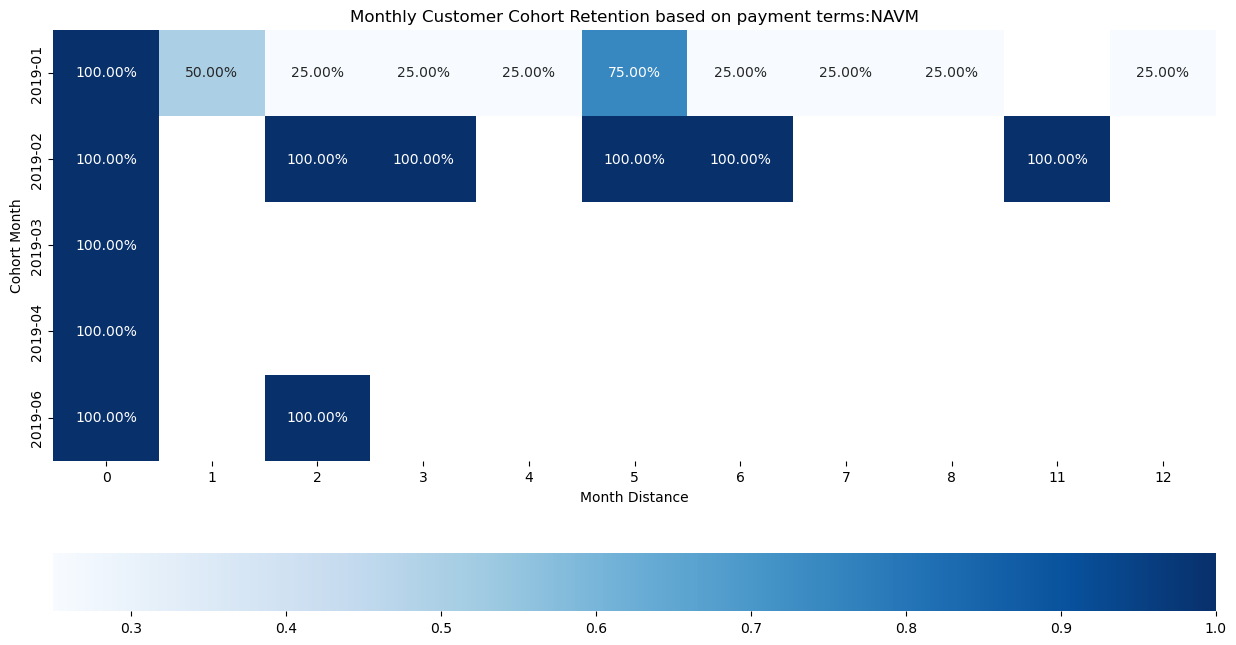

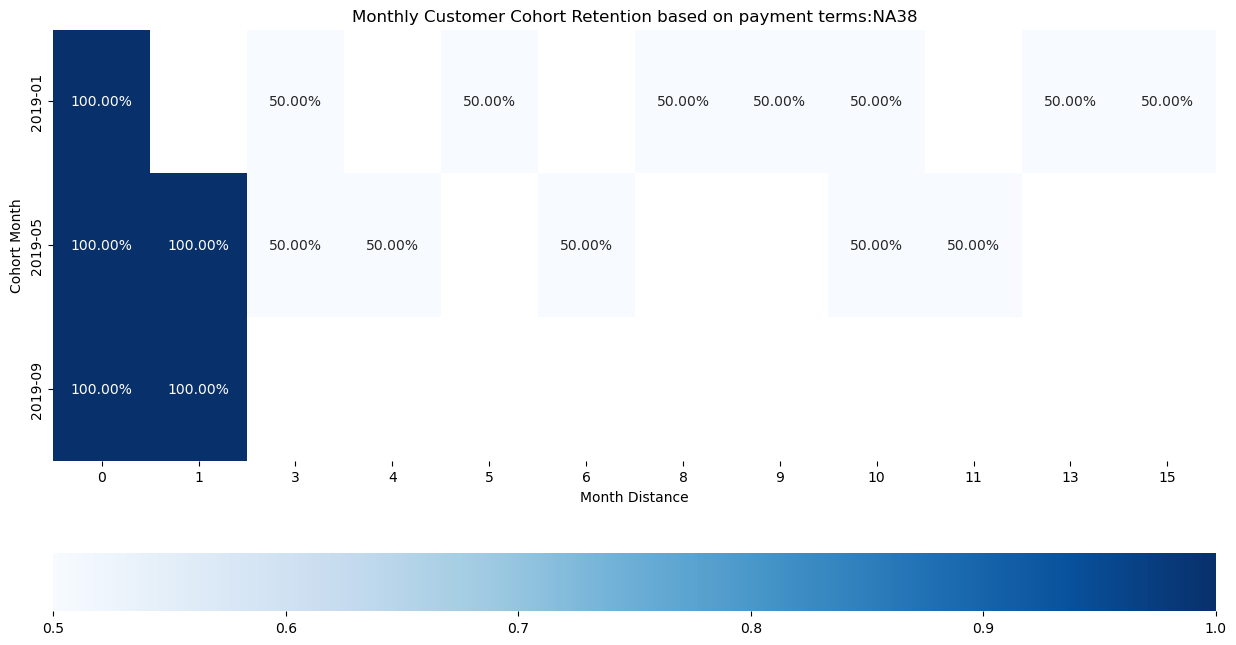

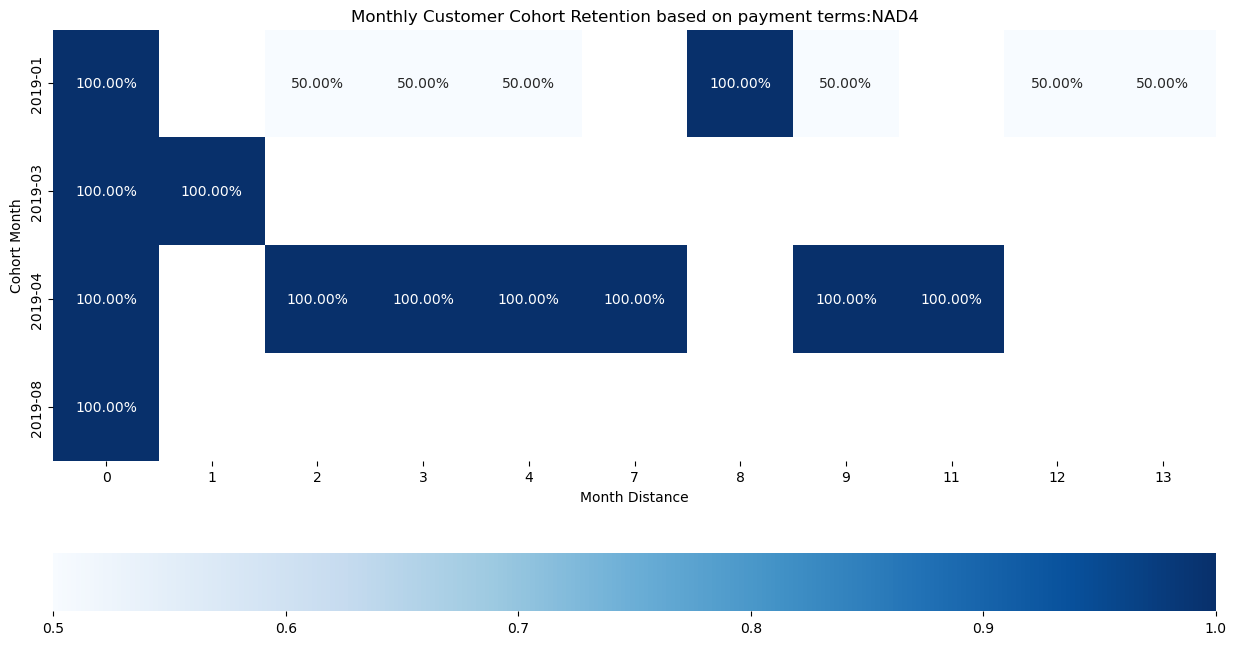

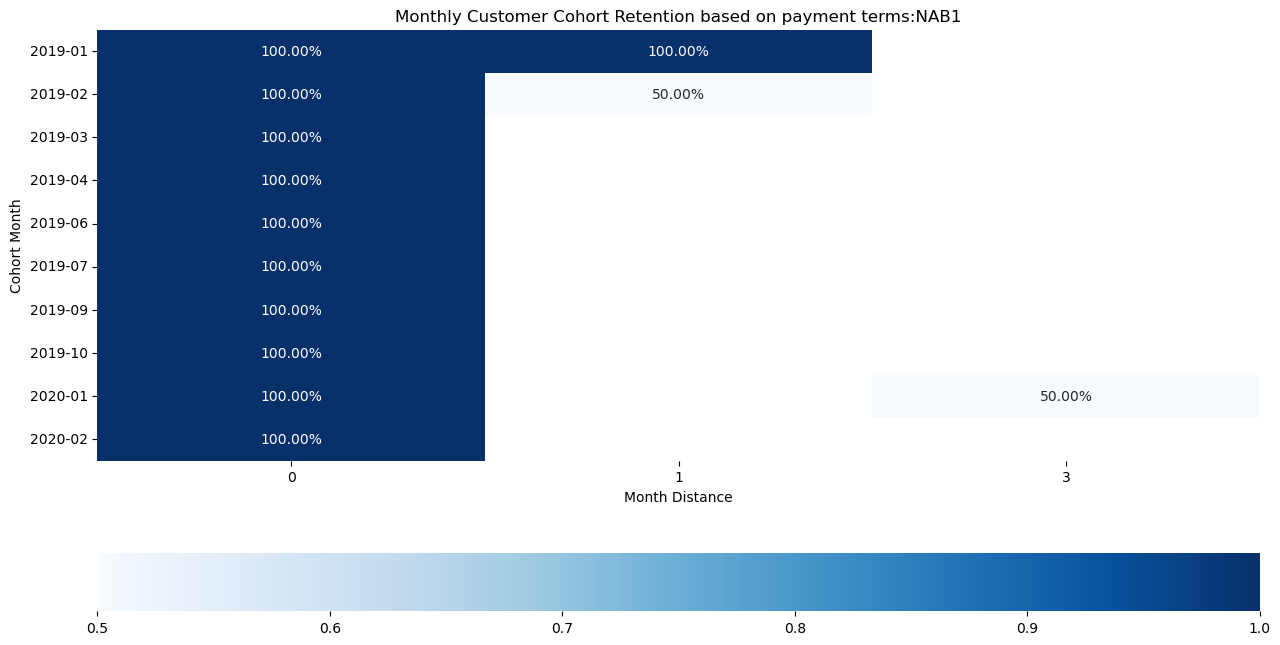

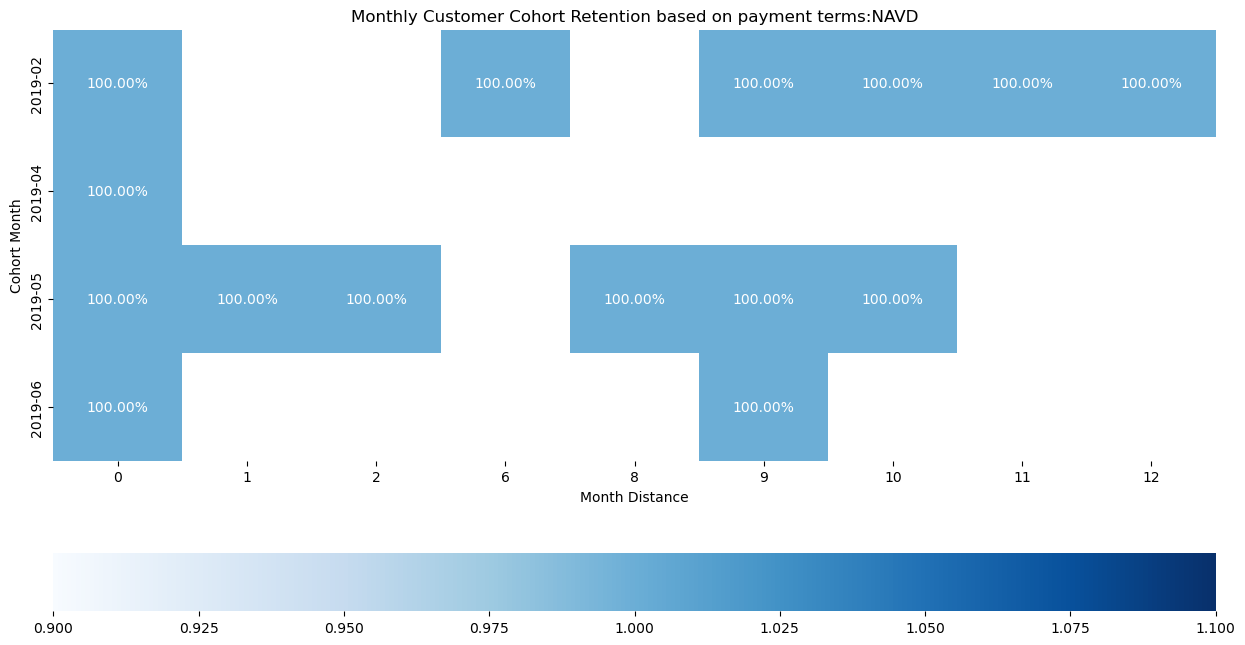

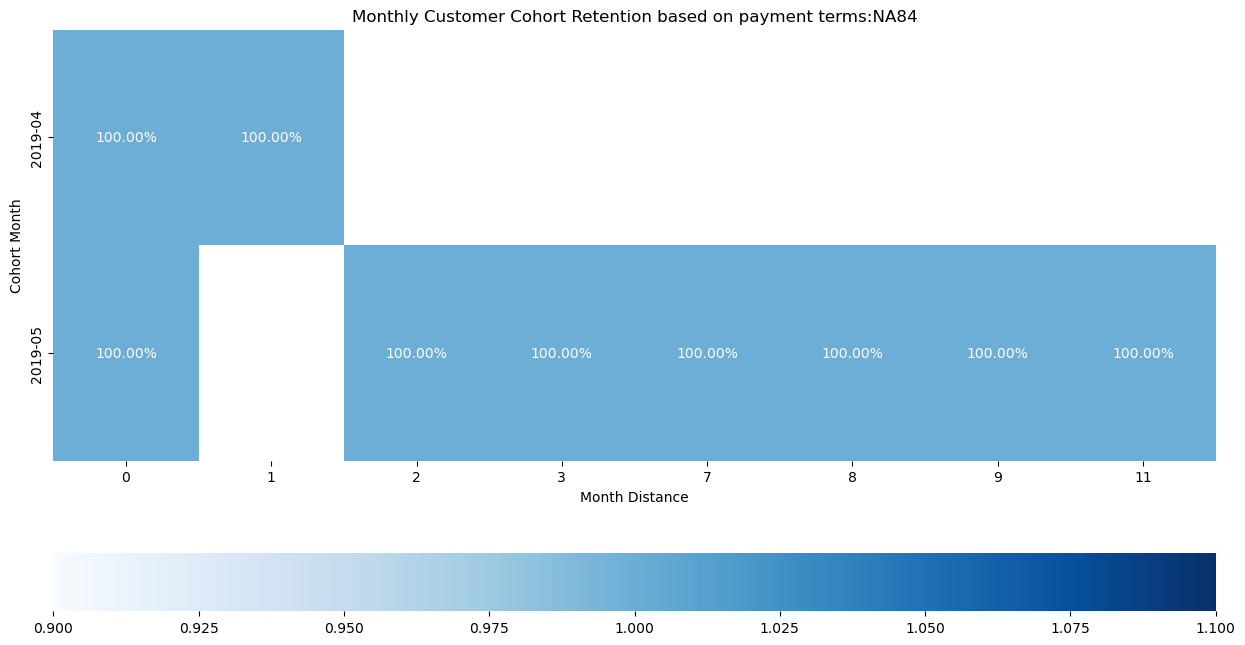

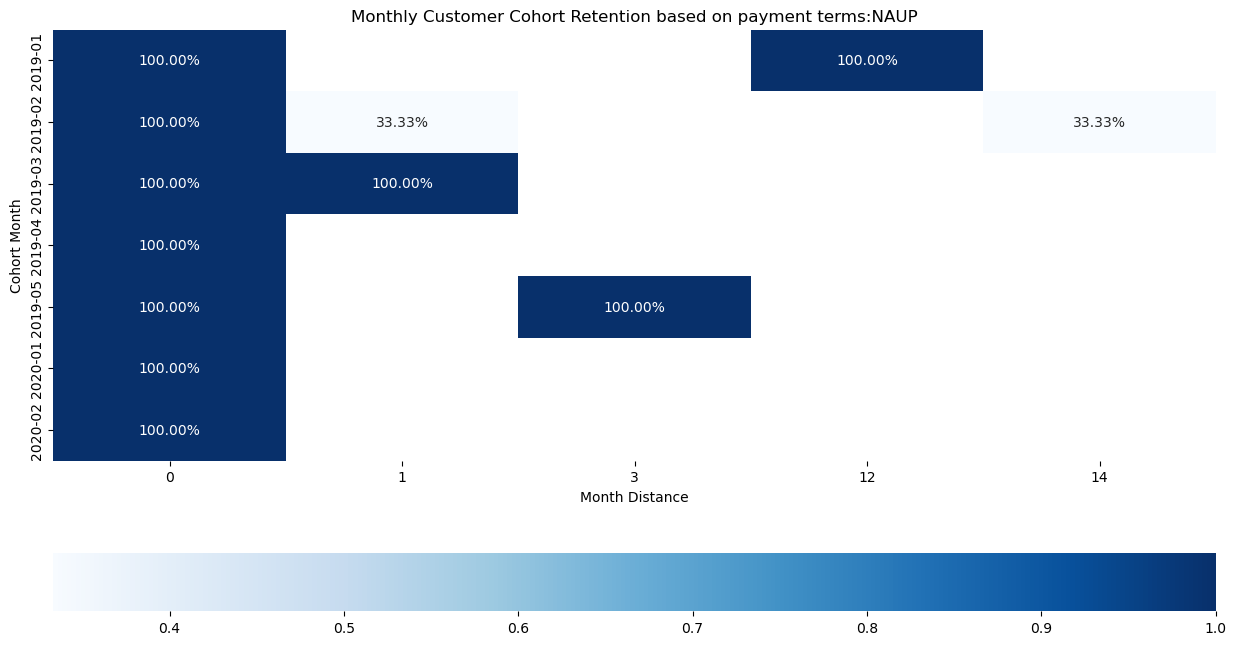

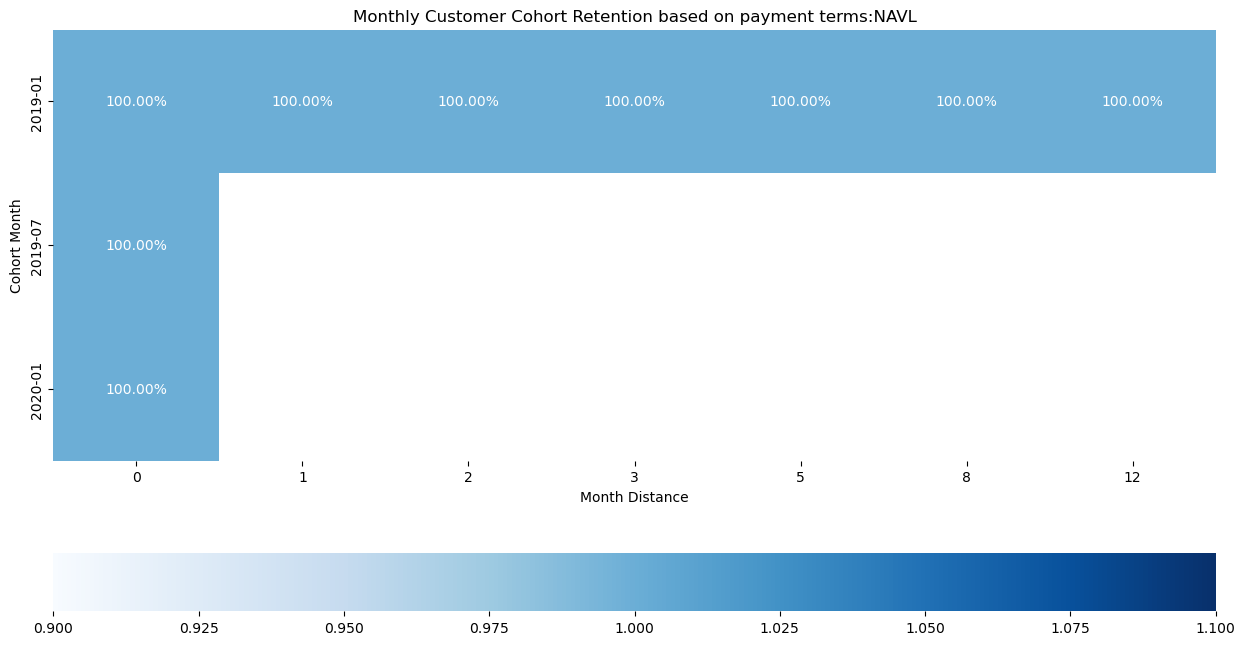

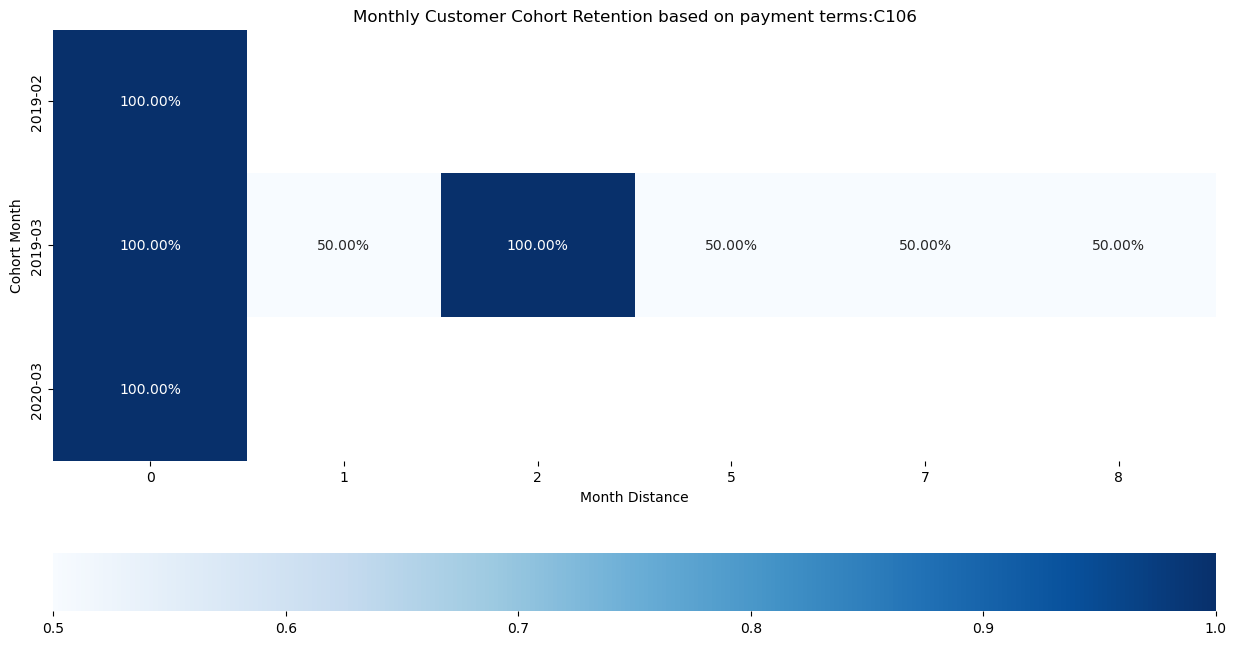

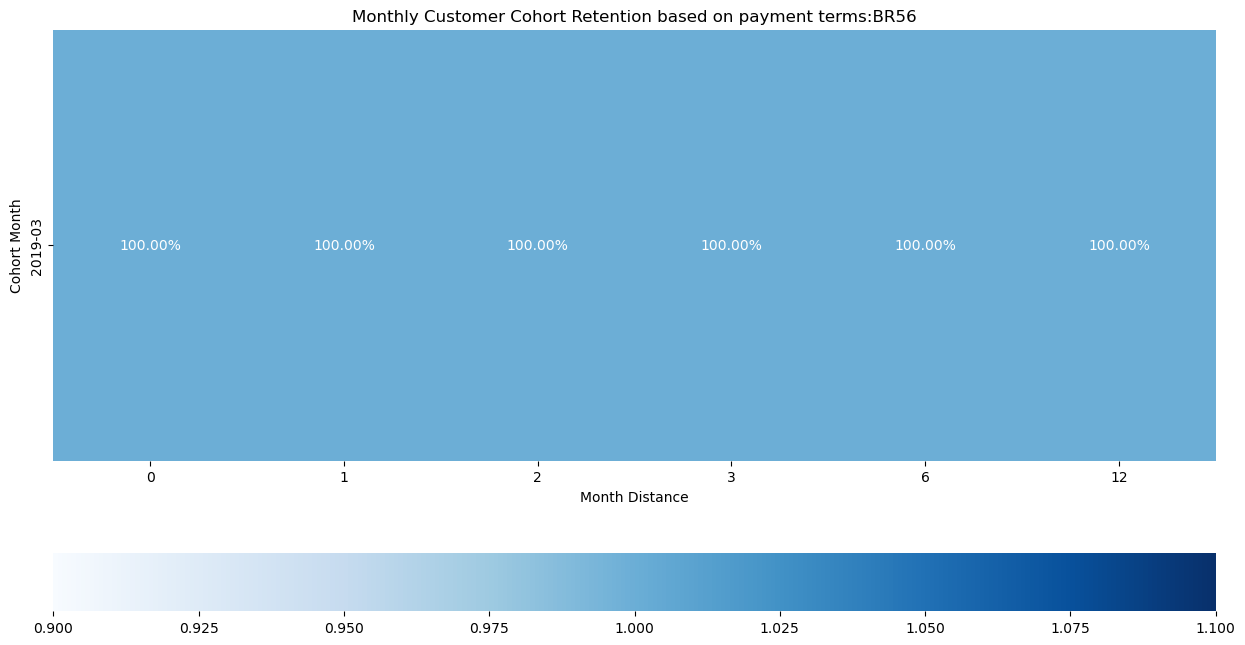

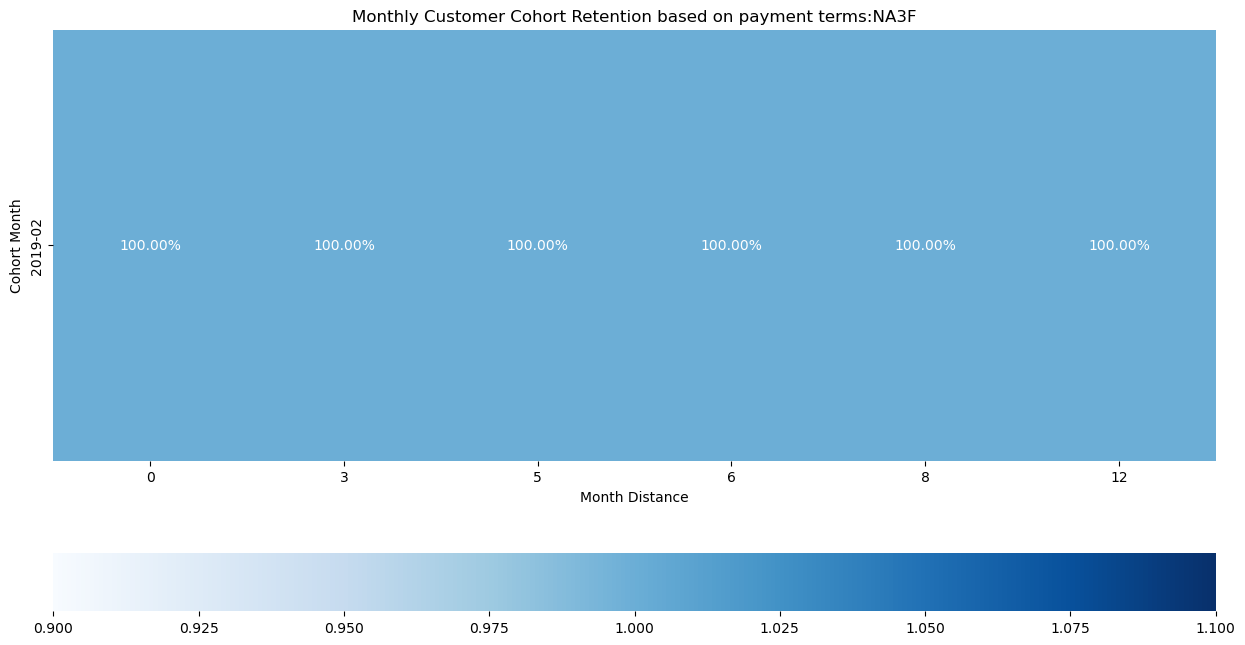

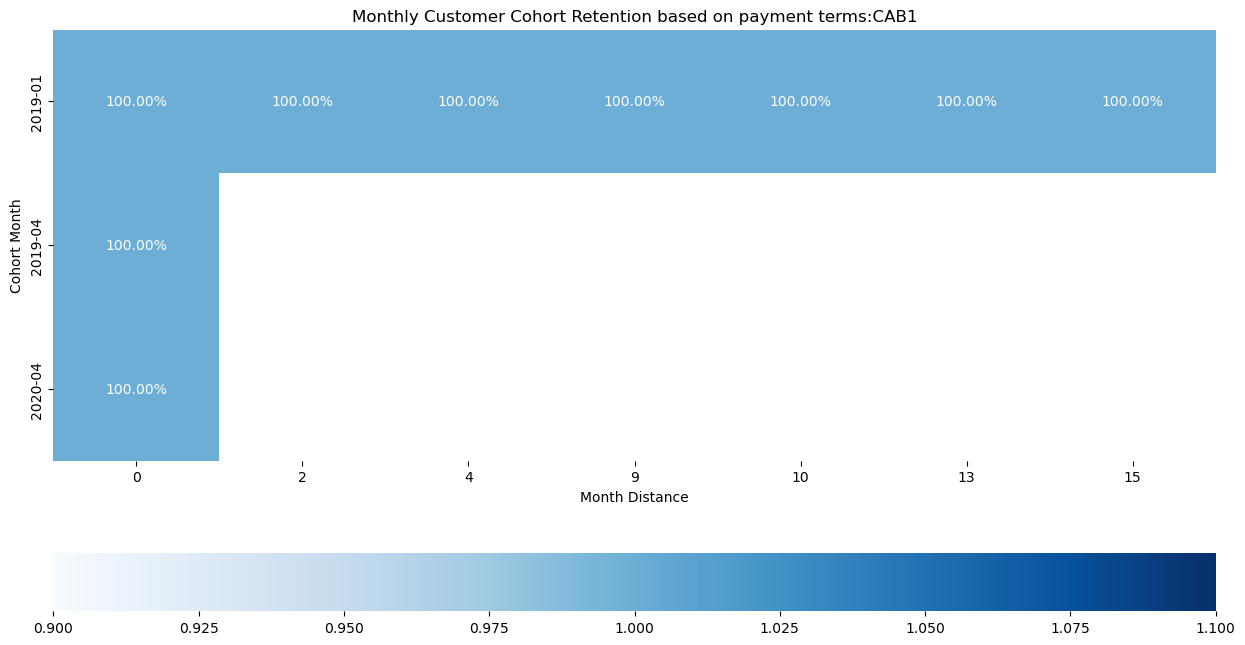

IndexError: single positional indexer is out-of-bounds

In [75]:
for i in y:
    df_cohort2 = df.copy()
    df_cohort2 = df_cohort2[df_cohort2['cust_payment_terms']==i]
    #define cohort month
    df_cohort2["cohort_month"] = df_cohort2.groupby("cust_number")["posting_date"].transform("min").dt.to_period('M')
    #drop 2018-12 & 2020-05
    df_cohort2 = df_cohort2[(df_cohort2['cohort_month'] != '2018-12') & (df_cohort2['cohort_month'] != '2020-05')]
    #define current transaction period
    df_cohort2['current_transaction_month']=df_cohort2['posting_date'].dt.to_period('M')
    df_cohort2=df_cohort2[df_cohort2['current_transaction_month']!='2020-05']
    df_cohort2=df_cohort2[['cust_number', 'cohort_month', 'current_transaction_month']]
    df_cohort2.drop_duplicates(inplace=True)
    #agregasi
    cohort_retention2=df_cohort2.groupby(['cohort_month','current_transaction_month'])['cust_number'].count().reset_index().rename(columns={'cust_number':'count_user'})
    cohort_retention2['period_distance'] = (
        (cohort_retention2['current_transaction_month'].dt.year - cohort_retention2['cohort_month'].dt.year) * 12 +
        (cohort_retention2['current_transaction_month'].dt.month - cohort_retention2['cohort_month'].dt.month))
    #pivot
    cohort_retention_pivot2=cohort_retention2.pivot_table(index='cohort_month',columns='period_distance',values='count_user')
    # retention to percentage
    cohort_retention_final2 = cohort_retention_pivot2.div(cohort_retention_pivot2.iloc[:, 0], axis=0)
    #create heatmap
    plt.figure(figsize=(15,8))
    sns.heatmap(data=cohort_retention_final2,annot=True,fmt='.2%',
               cbar_kws={'orientation':'horizontal'},
               cmap='Blues')
    plt.title(f'Monthly Customer Cohort Retention based on payment terms:{i}')
    plt.xlabel('Month Distance')
    plt.ylabel('Cohort Month')
    plt.show()

Berdasarkan heatmap per `business_code`, `invoice_currency`, dan `cust_payment_terms`,

tidak menunjukkan adanya perbedaan pola retensi. Maka, kami menyimpulkan bahwa heatmap overall sudah dapat merepresentasikan data

## CEK EDA baseline-jatuh tempo dan document to posting

Menyelidiki apakah pola tertentu jarak waktu antara penanda-tanganan invoice(baseline_date) terhadap jatuh tempo dari invoice(due_in_date), serta jarak waktu dari pengumpulan berkas dokumen (document_create_date) terhadap tanggal invoice masuk ke sistem (posting date) yang biasa disebut sebagai onboarding process.

In [124]:
df1=df.copy()

In [126]:
# Recalculate due_time_days using the corrected baseline_create_date
df1['due_time_days_corrected'] = (df1['due_in_date'] - df1['baseline_create_date']).dt.days

# Re-analyze the relationship between cust_payment_terms and the corrected due_time in months
df1['due_time_months_corrected'] = df1['due_time_days_corrected'] / 30.44  # Approximate days per month

In [128]:
#cek baseline ke jatuh tempo
df1['current_transaction_month']=df1['posting_date'].dt.to_period('M')
df1=df1[['cust_number', 'cohort_month', 'current_transaction_month', 'total_open_amount', 'invoice_id', 'due_time_months_corrected']]
df1.drop_duplicates(inplace=True)

df1['period_distance'] = (
    (df1['current_transaction_month'].dt.year - df1['cohort_month'].dt.year) * 12 +
    (df1['current_transaction_month'].dt.month - df1['cohort_month'].dt.month)
)
#ambil transaksi hanya di bulan pertama tiap user
df1=df1[df1['period_distance']==0]
df1

cust_number cohort_month current_transaction_month  total_open_amount  \
11     0200743129      2019-01                   2019-01          103147.37   
20     0100053554      2020-01                   2020-01            5683.50   
36     0200700919      2019-01                   2019-01           39221.31   
65      200561861      2019-06                   2019-06           22491.08   
97     0100033266      2019-11                   2019-11           17243.10   
...           ...          ...                       ...                ...   
49918  0200418007      2019-01                   2019-01            1142.12   
49926  0140104440      2019-01                   2019-01            5727.30   
49959  0200784489      2019-01                   2019-01           13624.09   
49969  0200759878      2019-01                   2019-01          130845.71   
49999  0200020431      2019-01                   2019-01            1790.30   

         invoice_id  due_time_months_corrected  period_distance  
11     1.928551e+09                   0.492773                0  
20     1.991838e+09                   0.985545                0  
36     1.928657e+09                   0.657030                0  
65     1.929446e+09                   0.492773                0  
97     1.930174e+09                   0.492773                0  
...             ...                        ...              ...  
49918  1.928679e+09                   0.492773                0  
49926  2.960523e+09                   0.328515                0  
49959  1.928642e+09                   0.492773                0  
49969  1.928685e+09                   1.478318                0  
49999  1.928576e+09                   0.755585                0  

[2700 rows x 7 columns]

In [130]:
df1.groupby('cohort_month')['due_time_months_corrected'].mean()

cohort_month
2018-12    0.511872
2019-01    0.556163
2019-02    0.713869
2019-03    0.657169
2019-04    0.587156
2019-05    0.675323
2019-06    0.610739
2019-07    0.613091
2019-08    0.605513
2019-09    0.594226
2019-10    0.492773
2019-11    0.640604
2019-12    0.470872
2020-01    0.799387
2020-02    0.683523
2020-03    0.617888
2020-04    0.602754
2020-05    0.459921
Freq: M, Name: due_time_months_corrected, dtype: float64

Tidak terdapat pola spesifik dari jarak waktu antara penanda-tanganan invoice(baseline_date) terhadap jatuh tempo dari invoice(due_in_date).

In [133]:
df1=df.copy()

#check onboarding process
df1['doc_to_post_time']=(df1['posting_date'] - df1['document_create_date']).dt.days
#cek doc create date ke posting ddate 
df1['current_transaction_month']=df1['posting_date'].dt.to_period('M')
df1=df1[['cust_number', 'cohort_month', 'current_transaction_month', 'total_open_amount', 'invoice_id', 'doc_to_post_time']]
df1.drop_duplicates(inplace=True)

df1['period_distance'] = (
    (df1['current_transaction_month'].dt.year - df1['cohort_month'].dt.year) * 12 +
    (df1['current_transaction_month'].dt.month - df1['cohort_month'].dt.month)
)
#ambil transaksi hanya di bulan pertama tiap user
df1=df1[df1['period_distance']==0]
df1

df1.groupby('cohort_month')['doc_to_post_time'].mean()

cohort_month
2018-12    0.720930
2019-01    0.938834
2019-02    1.333333
2019-03    1.248945
2019-04    1.277778
2019-05    1.386364
2019-06    1.227273
2019-07    0.650000
2019-08    1.886364
2019-09    1.529412
2019-10    1.735294
2019-11    2.531250
2019-12    1.066667
2020-01    1.333333
2020-02    0.677419
2020-03    1.425532
2020-04    0.521739
2020-05    0.200000
Freq: M, Name: doc_to_post_time, dtype: float64

Tidak ditemukan pola tertentu dari onboarding process (jarak waktu dari pengumpulan berkas dokumen (document_create_date) terhadap tanggal invoice masuk ke sistem (posting date)).

## CEK ACTIVE USERS

Melakukan pengecekan jumlah active customers. Active customers adalah customer yang masih melakukan transaksi per April 2020

In [138]:
df_cek = df.copy()
df_cek

business_code cust_number       name_customer clear_date  buisness_year  \
0              U001  0200769623        WAL-MAR corp 2020-02-11         2020.0   
1              U001  0200980828              BEN E  2019-08-08         2019.0   
2              U001  0200792734          MDV/ trust 2019-12-30         2019.0   
3              CA02  0140105686            SYSC llc        NaT         2020.0   
4              U001  0200769623  WAL-MAR foundation 2019-11-25         2019.0   
...             ...         ...                 ...        ...            ...   
49995          U001  0200561861      CO corporation        NaT         2020.0   
49996          U001  0200769623          WAL-MAR co 2019-09-03         2019.0   
49997          U001  0200772595    SAFEW associates 2020-03-05         2020.0   
49998          U001  0200726979           BJ'S  llc 2019-12-12         2019.0   
49999          U001  0200020431            DEC corp 2019-01-15         2019.0   

             doc_id posting_date document_create_date document_create_date.1  \
0      1.930438e+09   2020-01-26           2020-01-25             2020-01-26   
1      1.929646e+09   2019-07-22           2019-07-22             2019-07-22   
2      1.929874e+09   2019-09-14           2019-09-14             2019-09-14   
3      2.960623e+09   2020-03-30           2020-03-30             2020-03-30   
4      1.930148e+09   2019-11-13           2019-11-13             2019-11-13   
...             ...          ...                  ...                    ...   
49995  1.930797e+09   2020-04-21           2020-04-17             2020-04-21   
49996  1.929744e+09   2019-08-15           2019-08-14             2019-08-15   
49997  1.930537e+09   2020-02-19           2020-02-18             2020-02-19   
49998  1.930199e+09   2019-11-27           2019-11-26             2019-11-27   
49999  1.928576e+09   2019-01-05           2019-01-05             2019-01-05   

      due_in_date invoice_currency document type  posting_id  \
0      2020-02-10              USD            RV         1.0   
1      2019-08-11              USD            RV         1.0   
2      2019-09-29              USD            RV         1.0   
3      2020-04-10              CAD            RV         1.0   
4      2019-11-28              USD            RV         1.0   
...           ...              ...           ...         ...   
49995  2020-05-06              USD            RV         1.0   
49996  2019-08-30              USD            RV         1.0   
49997  2020-03-05              USD            RV         1.0   
49998  2019-12-12              USD            RV         1.0   
49999  2019-01-24              USD            RV         1.0   

       total_open_amount baseline_create_date cust_payment_terms  \
0               54273.28           2020-01-26               NAH4   
1               79656.60           2019-07-22               NAD1   
2                2253.86           2019-09-14               NAA8   
3                3299.70           2020-03-31               CA10   
4               33133.29           2019-11-13               NAH4   
...                  ...                  ...                ...   
49995            3187.86           2020-04-21               NAA8   
49996            6766.54           2019-08-15               NAH4   
49997            6120.86           2020-02-19               NAA8   
49998              63.48           2019-11-27               NAA8   
49999            1790.30           2019-01-01               NAM4   

         invoice_id  isOpen cohort_month  
0      1.930438e+09       0      2018-12  
1      1.929646e+09       0      2019-01  
2      1.929874e+09       0      2018-12  
3      2.960623e+09       1      2019-01  
4      1.930148e+09       0      2018-12  
...             ...     ...          ...  
49995  1.930797e+09       1      2019-01  
49996  1.929744e+09       0      2018-12  
49997  1.930537e+09       0      2019-01  
49998  1.930199e+09       0      2018-12  
49999  1.9285

In [140]:
#drop cohort 2018-12 dan drop 2020-05
df_cek = df_cek[(df_cek['cohort_month'] != '2018-12')&(df_cohort['cohort_month'] != '2020-05')]
#define current transaction period
df_cek['current_transaction_month']=df_cek['posting_date'].dt.to_period('M')

#drop current transaction period 2020-05
df_cek=df_cek[df_cek['current_transaction_month']!='2020-05']
df_cek

business_code cust_number     name_customer clear_date  buisness_year  \
1              U001  0200980828            BEN E  2019-08-08         2019.0   
3              CA02  0140105686          SYSC llc        NaT         2020.0   
10             U001  0200418007               AM         NaT         2020.0   
11             U001  0200743129         BROOKS co 2019-01-22         2019.0   
12             U001  0200186937  SYSC corporation 2019-05-06         2019.0   
...             ...         ...               ...        ...            ...   
49903          U001   200230690          DECA llc 2019-06-03         2019.0   
49909          U013  0140101682         SUPERVAL  2019-08-15         2019.0   
49932          U001  0200498283           FOOD S  2019-11-27         2019.0   
49945          U001  0200701487      KAGO systems 2020-02-25         2020.0   
49959          U001  0200784489           GE corp 2019-02-01         2019.0   

             doc_id posting_date document_create_date document_create_date.1  \
1      1.929646e+09   2019-07-22           2019-07-22             2019-07-22   
3      2.960623e+09   2020-03-30           2020-03-30             2020-03-30   
10     1.930611e+09   2020-03-11           2020-03-06             2020-03-11   
11     1.928551e+09   2019-01-02           2019-01-02             2019-01-02   
12     1.929152e+09   2019-04-15           2019-04-15             2019-04-15   
...             ...          ...                  ...                    ...   
49903  1.929353e+09   2019-05-21           2019-05-21             2019-05-21   
49909  1.991830e+09   2019-07-06           2019-07-02             2019-07-06   
49932  1.930035e+09   2019-10-21           2019-10-19             2019-10-21   
49945  1.930516e+09   2020-02-19           2020-02-11             2020-02-19   
49959  1.928642e+09   2019-01-17           2019-01-17             2019-01-17   

      due_in_date invoice_currency document type  posting_id  \
1      2019-08-11              USD            RV         1.0   
3      2020-04-10              CAD            RV         1.0   
10     2020-03-26              USD            RV         1.0   
11     2019-01-17              USD            RV         1.0   
12     2019-04-30              USD            RV         1.0   
...           ...              ...           ...         ...   
49903  2019-06-08              USD            RV         1.0   
49909  2019-08-05              USD            RV         1.0   
49932  2019-11-05              USD            RV         1.0   
49945  2020-02-29              USD            RV         1.0   
49959  2019-02-01              USD            RV         1.0   

       total_open_amount baseline_create_date cust_payment_terms  \
1               79656.60           2019-07-22               NAD1   
3                3299.70           2020-03-31               CA10   
10               3525.59           2020-03-11               NAA8   
11             103147.37           2019-01-02               NAA8   
12              16381.45           2019-04-15               NAA8   
...                  ...                  ...                ...   
49903            1610.37           2019-05-16               NAM4   
49909           13182.92           2019-07-06               NAVE   
49932           31243.32           2019-10-21               NAA8   
49945            7026.80           2020-02-19               NA10   
49959           13624.09           2019-01-17               NAA8   

         invoice_id  isOpen cohort_month current_transaction_month  
1      1.929646e+09       0      2019-01                   2019-07  
3      2.960623e+09       1      2019-01                   2020-03  
10     1.930611e+09       1      2019-01                   2020-03  
11     1.928551e+09       0      2019-01                   2019-01  
12     1.929152e+09       0      2019-01                   2019-04  
...             ...     ...          ...                       ...  
49903  1.929353e+09       0

Melakukan perhitungan jumlah customers yang masih melakukan transaksi per April 2020.

In [143]:
df_cek[df_cek['current_transaction_month']=='2020-04']['cust_number'].nunique()

362

Melakukan perhitungan total jumlah customers yang telah melakukan transaksi di perusahaan,

In [146]:
df_cek['cust_number'].nunique()

1380

Per bulan awal Mei, terdapat 362 active customers ddan 1380 total customers. Kemudian, lakukan perhitungan retention rate, yakni hasil pembagian active customers terhadap total customers,

In [151]:
df_cek[df_cek['current_transaction_month']=='2020-04']['cust_number'].nunique()/(df_cek['cust_number'].nunique())

0.26231884057971017

Retention rate per bulan april adalah 26%, dibawah rata-rata standar industri (sekitar 70%). Hal ini menunjukkan bahwa terdapat masalah churn di perusahaan ini.

Membuat kolom isactive, berdasarkan tanggal transaksi (current_transaction_month), jika transaksi dilakukan pada 2020-04, maka isactive = 1.

In [155]:
df_cek['isactive']=np.nan
df_cek

business_code cust_number     name_customer clear_date  buisness_year  \
1              U001  0200980828            BEN E  2019-08-08         2019.0   
3              CA02  0140105686          SYSC llc        NaT         2020.0   
10             U001  0200418007               AM         NaT         2020.0   
11             U001  0200743129         BROOKS co 2019-01-22         2019.0   
12             U001  0200186937  SYSC corporation 2019-05-06         2019.0   
...             ...         ...               ...        ...            ...   
49903          U001   200230690          DECA llc 2019-06-03         2019.0   
49909          U013  0140101682         SUPERVAL  2019-08-15         2019.0   
49932          U001  0200498283           FOOD S  2019-11-27         2019.0   
49945          U001  0200701487      KAGO systems 2020-02-25         2020.0   
49959          U001  0200784489           GE corp 2019-02-01         2019.0   

             doc_id posting_date document_create_date document_create_date.1  \
1      1.929646e+09   2019-07-22           2019-07-22             2019-07-22   
3      2.960623e+09   2020-03-30           2020-03-30             2020-03-30   
10     1.930611e+09   2020-03-11           2020-03-06             2020-03-11   
11     1.928551e+09   2019-01-02           2019-01-02             2019-01-02   
12     1.929152e+09   2019-04-15           2019-04-15             2019-04-15   
...             ...          ...                  ...                    ...   
49903  1.929353e+09   2019-05-21           2019-05-21             2019-05-21   
49909  1.991830e+09   2019-07-06           2019-07-02             2019-07-06   
49932  1.930035e+09   2019-10-21           2019-10-19             2019-10-21   
49945  1.930516e+09   2020-02-19           2020-02-11             2020-02-19   
49959  1.928642e+09   2019-01-17           2019-01-17             2019-01-17   

      due_in_date  ... document type posting_id  total_open_amount  \
1      2019-08-11  ...            RV        1.0           79656.60   
3      2020-04-10  ...            RV        1.0            3299.70   
10     2020-03-26  ...            RV        1.0            3525.59   
11     2019-01-17  ...            RV        1.0          103147.37   
12     2019-04-30  ...            RV        1.0           16381.45   
...           ...  ...           ...        ...                ...   
49903  2019-06-08  ...            RV        1.0            1610.37   
49909  2019-08-05  ...            RV        1.0           13182.92   
49932  2019-11-05  ...            RV        1.0           31243.32   
49945  2020-02-29  ...            RV        1.0            7026.80   
49959  2019-02-01  ...            RV        1.0           13624.09   

       baseline_create_date cust_payment_terms    invoice_id  isOpen  \
1                2019-07-22               NAD1  1.929646e+09       0   
3                2020-03-31               CA10  2.960623e+09       1   
10               2020-03-11               NAA8  1.930611e+09       1   
11               2019-01-02               NAA8  1.928551e+09       0   
12               2019-04-15               NAA8  1.929152e+09       0   
...                     ...                ...           ...     ...   
49903            2019-05-16               NAM4  1.929353e+09       0   
49909            2019-07-06               NAVE  1.991830e+09       0   
49932            2019-10-21               NAA8  1.930035e+09       0   
49945            2020-02-19               NA10  1.930516e+09       0   
49959            2019-01-17               NAA8  1.928642e+09       0   

       cohort_month current_transaction_month isactive  
1           2019-01                   2019-07      NaN  
3           2019-01                   2020-03      NaN  
10          2019-01                   2020-03      NaN  
11          2019-01                   2019-01      NaN  
12          2019-01                   2019-04      NaN  
...             ...                       ...   

In [157]:
df_cek['isactive']=np.where(df_cek['current_transaction_month']=='2020-04', 1, df_cek['isactive'])
df_cek['isactive']=np.where(df_cek['current_transaction_month']!='2020-04', 0, df_cek['isactive'])
df_cek

business_code cust_number     name_customer clear_date  buisness_year  \
1              U001  0200980828            BEN E  2019-08-08         2019.0   
3              CA02  0140105686          SYSC llc        NaT         2020.0   
10             U001  0200418007               AM         NaT         2020.0   
11             U001  0200743129         BROOKS co 2019-01-22         2019.0   
12             U001  0200186937  SYSC corporation 2019-05-06         2019.0   
...             ...         ...               ...        ...            ...   
49903          U001   200230690          DECA llc 2019-06-03         2019.0   
49909          U013  0140101682         SUPERVAL  2019-08-15         2019.0   
49932          U001  0200498283           FOOD S  2019-11-27         2019.0   
49945          U001  0200701487      KAGO systems 2020-02-25         2020.0   
49959          U001  0200784489           GE corp 2019-02-01         2019.0   

             doc_id posting_date document_create_date document_create_date.1  \
1      1.929646e+09   2019-07-22           2019-07-22             2019-07-22   
3      2.960623e+09   2020-03-30           2020-03-30             2020-03-30   
10     1.930611e+09   2020-03-11           2020-03-06             2020-03-11   
11     1.928551e+09   2019-01-02           2019-01-02             2019-01-02   
12     1.929152e+09   2019-04-15           2019-04-15             2019-04-15   
...             ...          ...                  ...                    ...   
49903  1.929353e+09   2019-05-21           2019-05-21             2019-05-21   
49909  1.991830e+09   2019-07-06           2019-07-02             2019-07-06   
49932  1.930035e+09   2019-10-21           2019-10-19             2019-10-21   
49945  1.930516e+09   2020-02-19           2020-02-11             2020-02-19   
49959  1.928642e+09   2019-01-17           2019-01-17             2019-01-17   

      due_in_date  ... document type posting_id  total_open_amount  \
1      2019-08-11  ...            RV        1.0           79656.60   
3      2020-04-10  ...            RV        1.0            3299.70   
10     2020-03-26  ...            RV        1.0            3525.59   
11     2019-01-17  ...            RV        1.0          103147.37   
12     2019-04-30  ...            RV        1.0           16381.45   
...           ...  ...           ...        ...                ...   
49903  2019-06-08  ...            RV        1.0            1610.37   
49909  2019-08-05  ...            RV        1.0           13182.92   
49932  2019-11-05  ...            RV        1.0           31243.32   
49945  2020-02-29  ...            RV        1.0            7026.80   
49959  2019-02-01  ...            RV        1.0           13624.09   

       baseline_create_date cust_payment_terms    invoice_id  isOpen  \
1                2019-07-22               NAD1  1.929646e+09       0   
3                2020-03-31               CA10  2.960623e+09       1   
10               2020-03-11               NAA8  1.930611e+09       1   
11               2019-01-02               NAA8  1.928551e+09       0   
12               2019-04-15               NAA8  1.929152e+09       0   
...                     ...                ...           ...     ...   
49903            2019-05-16               NAM4  1.929353e+09       0   
49909            2019-07-06               NAVE  1.991830e+09       0   
49932            2019-10-21               NAA8  1.930035e+09       0   
49945            2020-02-19               NA10  1.930516e+09       0   
49959            2019-01-17               NAA8  1.928642e+09       0   

       cohort_month current_transaction_month isactive  
1           2019-01                   2019-07      0.0  
3           2019-01                   2020-03      0.0  
10          2019-01                   2020-03      0.0  
11          2019-01                   2019-01      0.0  
12          2019-01                   2019-04      0.0  
...             ...                       ...   

In [159]:
df_cek['isactive'].value_counts()

isactive
0.0    6013
1.0     362
Name: count, dtype: int64

In [161]:
362/6013

0.060202893730251124

6 persen dari transaksi dilakukan pada bulan April. KOLOM ISACTIVE akan digunakan dalam uji statistik.

# UJI STATISTIK

Berdasarkan visualisasi heatmap per kategori, tidak ditemukan adanya perbedaan pola retensi jika dibandingkan dengan heat map overall. Oleh karena itu, dilakukan uji statistik untuk menguji apakah ada relasi antara kolom kategorikal tersebut terhadap retention (isactive).

Pertama, melakukan uji statistik dengan metode chi-squared, untuk menguji apakah line-of-business (business_code) berpengaruh terhadap retention (isactive)

`Asumsi` : Menguji apakah business_code berpengaruh terhadap isactive
    
`Hipotesis` :
    
$H_{0}$ : kedua variabel tidak berpengaruh

$H_{a}$ : kedua variabel berpengaruh 

`Signifikansi` 
$\alpha=0.05$

`Pengambilan Kesimpulan` :
- p-value $\leq \alpha$ : Reject $H_{0}$ 
- p-value $> \alpha$ : Failed to Reject $H_{0}$ 

In [167]:
# Check unique values in business_code and isactive
business_code_counts = df_cek['business_code'].value_counts()
isactive_counts = df_cek['isactive'].value_counts()

# Pivot table for contingency (frequency) between business_code and isactive
contingency_table = pd.crosstab(df_cek['business_code'], df_cek['isactive'])

business_code_counts, isactive_counts, contingency_table

(business_code
 U001    5192
 CA02     737
 U013     367
 U002      67
 U005       9
 U007       3
 Name: count, dtype: int64,
 isactive
 0.0    6013
 1.0     362
 Name: count, dtype: int64,
 isactive        0.0  1.0
 business_code           
 CA02            696   41
 U001           4889  303
 U002             63    4
 U005              8    1
 U007              2    1
 U013            355   12)

In [169]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results of the Chi-Square Test
chi2, p, dof, expected

(9.02446433799382,
 0.10809232752572018,
 5,
 array([[6.95149961e+02, 4.18500392e+01],
        [4.89717584e+03, 2.94824157e+02],
        [6.31954510e+01, 3.80454902e+00],
        [8.48894118e+00, 5.11058824e-01],
        [2.82964706e+00, 1.70352941e-01],
        [3.46160157e+02, 2.08398431e+01]]))

Berdasarkan uji statistik, p-value >0.05. Maka, failed to reject h0, tidak cukup bukti untuk menolak bahwa variabel business_code tidak berpengaruh terhadap retensi

Kemudian, uji statistik untuk variabel mata uang terhadap retensi,

In [172]:
# Check unique values in invoice_currency and isactive
invoice_currency_counts = df_cek['invoice_currency'].value_counts()
isactive_counts = df_cek['isactive'].value_counts()

# Pivot table for contingency (frequency) between business_code and isactive
contingency_table2 = pd.crosstab(df_cek['invoice_currency'], df_cek['isactive'])

business_code_counts, isactive_counts, contingency_table2

(business_code
 U001    5192
 CA02     737
 U013     367
 U002      67
 U005       9
 U007       3
 Name: count, dtype: int64,
 isactive
 0.0    6013
 1.0     362
 Name: count, dtype: int64,
 isactive           0.0  1.0
 invoice_currency           
 CAD                698   41
 USD               5315  321)

In [174]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table2)

# Results of the Chi-Square Test
chi2, p, dof, expected

(0.0061422419423639765,
 0.9375317826302378,
 1,
 array([[ 697.03639216,   41.96360784],
        [5315.96360784,  320.03639216]]))

Berdasarkan uji statistik, p-value >0.05. Maka, failed to reject h0, tidak cukup bukti untuk menolak bahwa variabel mata uang tidak berpengaruh terhadap retensi

Kemudian, uji statistik untuk variabel payment_term terhadap retensi,

In [177]:
# Check unique values in business_code and isactive
payment_terms_counts = df_cek['cust_payment_terms'].value_counts()
isactive_counts = df_cek['isactive'].value_counts()

# Pivot table for contingency (frequency) between business_code and isactive
contingency_table3 = pd.crosstab(df_cek['cust_payment_terms'], df_cek['isactive'])

business_code_counts, isactive_counts, contingency_table3

(business_code
 U001    5192
 CA02     737
 U013     367
 U002      67
 U005       9
 U007       3
 Name: count, dtype: int64,
 isactive
 0.0    6013
 1.0     362
 Name: count, dtype: int64,
 isactive            0.0  1.0
 cust_payment_terms          
 90M7                  3    0
 B052                  3    0
 BR12                  2    0
 BR56                  6    0
 C106                 10    0
 ...                 ...  ...
 NAWM                  2    0
 NAWN                  6    0
 NAWP                  1    0
 NAWU                 14    0
 NAX2                  2    0
 
 [69 rows x 2 columns])

In [179]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table3)

# Results of the Chi-Square Test
chi2, p, dof, expected

(66.89617861316667,
 0.5151104678779735,
 68,
 array([[2.82964706e+00, 1.70352941e-01],
        [2.82964706e+00, 1.70352941e-01],
        [1.88643137e+00, 1.13568627e-01],
        [5.65929412e+00, 3.40705882e-01],
        [9.43215686e+00, 5.67843137e-01],
        [6.46102745e+02, 3.88972549e+01],
        [2.35803922e+01, 1.41960784e+00],
        [9.43215686e-01, 5.67843137e-02],
        [8.48894118e+00, 5.11058824e-01],
        [9.43215686e-01, 5.67843137e-02],
        [9.43215686e-01, 5.67843137e-02],
        [2.82021490e+02, 1.69785098e+01],
        [4.71607843e+00, 2.83921569e-01],
        [1.88643137e+00, 1.13568627e-01],
        [1.39595922e+02, 8.40407843e+00],
        [1.88643137e+01, 1.13568627e+00],
        [1.32050196e+01, 7.94980392e-01],
        [5.65929412e+00, 3.40705882e-01],
        [4.71607843e+00, 2.83921569e-01],
        [3.44085082e+03, 2.07149176e+02],
        [9.43215686e-01, 5.67843137e-02],
        [7.54572549e+00, 4.54274510e-01],
        [1.69778824e+01, 1.022

Berdasarkan uji statistik, p-value >0.05. Maka, failed to reject h0, tidak cukup bukti untuk menolak bahwa variabel payment_term tidak berpengaruh terhadap retensi.